In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load your dataset
file_path = '/content/drive/MyDrive/Defense help/Oishi/Product Purchasing  Sentiments Analysis for Monitoring Cosmetic Brand and Beauty Products Reviews on User Feedback.xlsx'

In [4]:
df = pd.read_excel(file_path)

# **Dataset Pre-Processing**

In [ ]:
# Print all column names in the dataset
print(df.columns)


Index(['What is your age?', 'What is your gender?',
       'What type of skin do you have ?',
       'What is your budget for cosmetics per month?',
       'What cosmetics brands do you currently use for cleansers?( facewash,shampoo,bodywash)',
       'Which country is this cleanser brand from?',
       'What rating would you give this brand of cleanser ?',
       'What cosmetics brands do you currently use for moisturizers?(Lotion,Cream,Conditioner)',
       'Which country is this moisturizers brand from?',
       'What rating would you give this brand of moisturizer ?',
       'What cosmetics brands do you currently use for serum (gel,essence,toner)?',
       'Which country is this serum brand from?',
       'What rating would you give this brand of serum?',
       'What cosmetics brands do you currently use for oils?(Hair oil,body oil,face oil)',
       'Which country is this oil brand from?',
       'What rating would you give this brand of oil ?'],
      dtype='object')


In [ ]:
# Print first 5 rows and columns of the dataset
print("First 5 rows and columns of the dataset:")
print(df.head())


First 5 rows and columns of the dataset:
   What is your age? What is your gender? What type of skin do you have ?  \
0               23.0                 Male                            Oily   
1               24.0                 Male                             Dry   
2               21.0               Female                             Dry   
3               23.0               Female                            Oily   
4               33.0               Female                            Oily   

  What is your budget for cosmetics per month?  \
0                                         2000   
1                                         2000   
2                                  It depends    
3                                         1000   
4                                          500   

  What cosmetics brands do you currently use for cleansers?( facewash,shampoo,bodywash)  \
0                                              Ponds                                      
1            

In [ ]:
# Print number of attributes and rows for the dataset
num_attributes = len(df.columns)
num_rows = len(df)
print("\nNumber of attributes:", num_attributes)
print("Number of rows:", num_rows)



Number of attributes: 16
Number of rows: 511


In [ ]:
# Print non-null value counts and data types for each attribute in the dataset
print("\nNon-null value counts and data types for each attribute:")
print(df.info())



Non-null value counts and data types for each attribute:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 16 columns):
 #   Column                                                                                  Non-Null Count  Dtype  
---  ------                                                                                  --------------  -----  
 0   What is your age?                                                                       508 non-null    float64
 1   What is your gender?                                                                    509 non-null    object 
 2   What type of skin do you have ?                                                         509 non-null    object 
 3   What is your budget for cosmetics per month?                                            511 non-null    object 
 4   What cosmetics brands do you currently use for cleansers?( facewash,shampoo,bodywash)   509 non-null    object 
 5   Which country

In [ ]:
# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())



Missing values in the dataset:
What is your age?                                                                          3
What is your gender?                                                                       2
What type of skin do you have ?                                                            2
What is your budget for cosmetics per month?                                               0
What cosmetics brands do you currently use for cleansers?( facewash,shampoo,bodywash)      2
Which country is this cleanser brand from?                                                 1
What rating would you give this brand of cleanser ?                                        2
What cosmetics brands do you currently use for moisturizers?(Lotion,Cream,Conditioner)     1
Which country is this moisturizers brand from?                                             2
What rating would you give this brand of moisturizer ?                                     3
What cosmetics brands do you currently

In [ ]:
# Print the number of non-null values before handling
print("\nNumber of non-null values before handling:")
print(df.count().sum())
# Print the number of missing values before handling
print("\nNumber of missing values before handling:")
print(df.isnull().sum().sum())


Number of non-null values before handling:
8078

Number of missing values before handling:
98


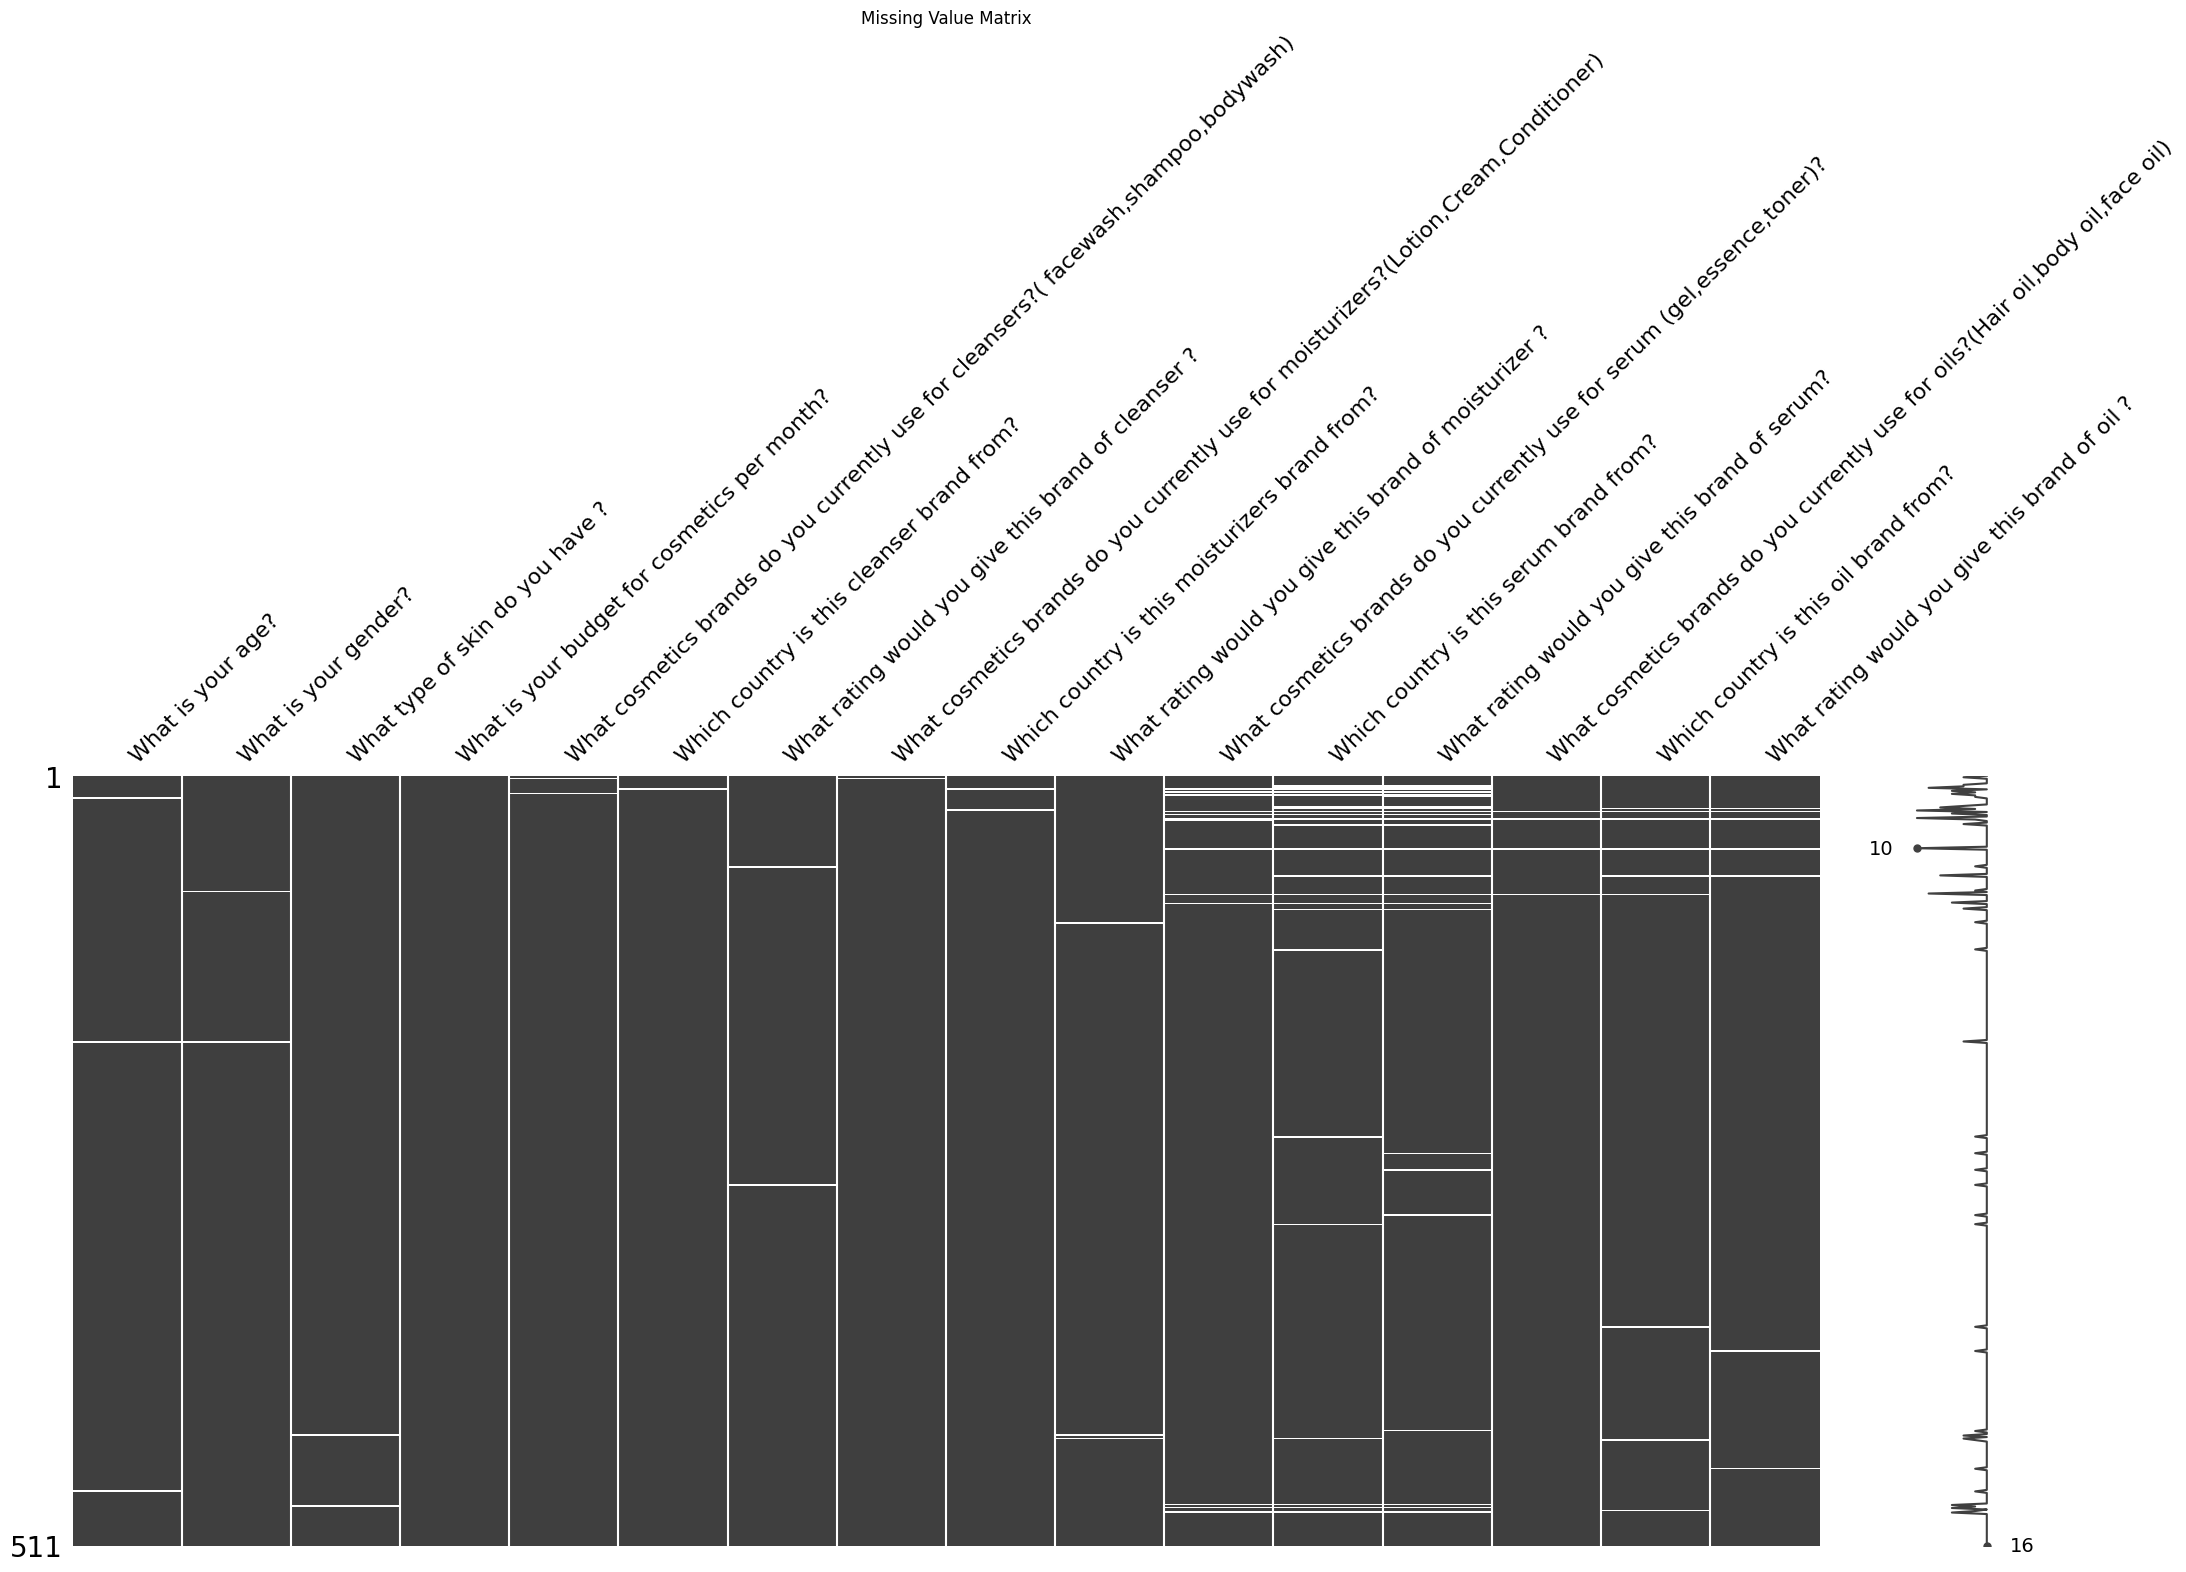

In [ ]:
# Visualize missing values using a matrix
msno.matrix(df)
plt.title('Missing Value Matrix')
plt.show()

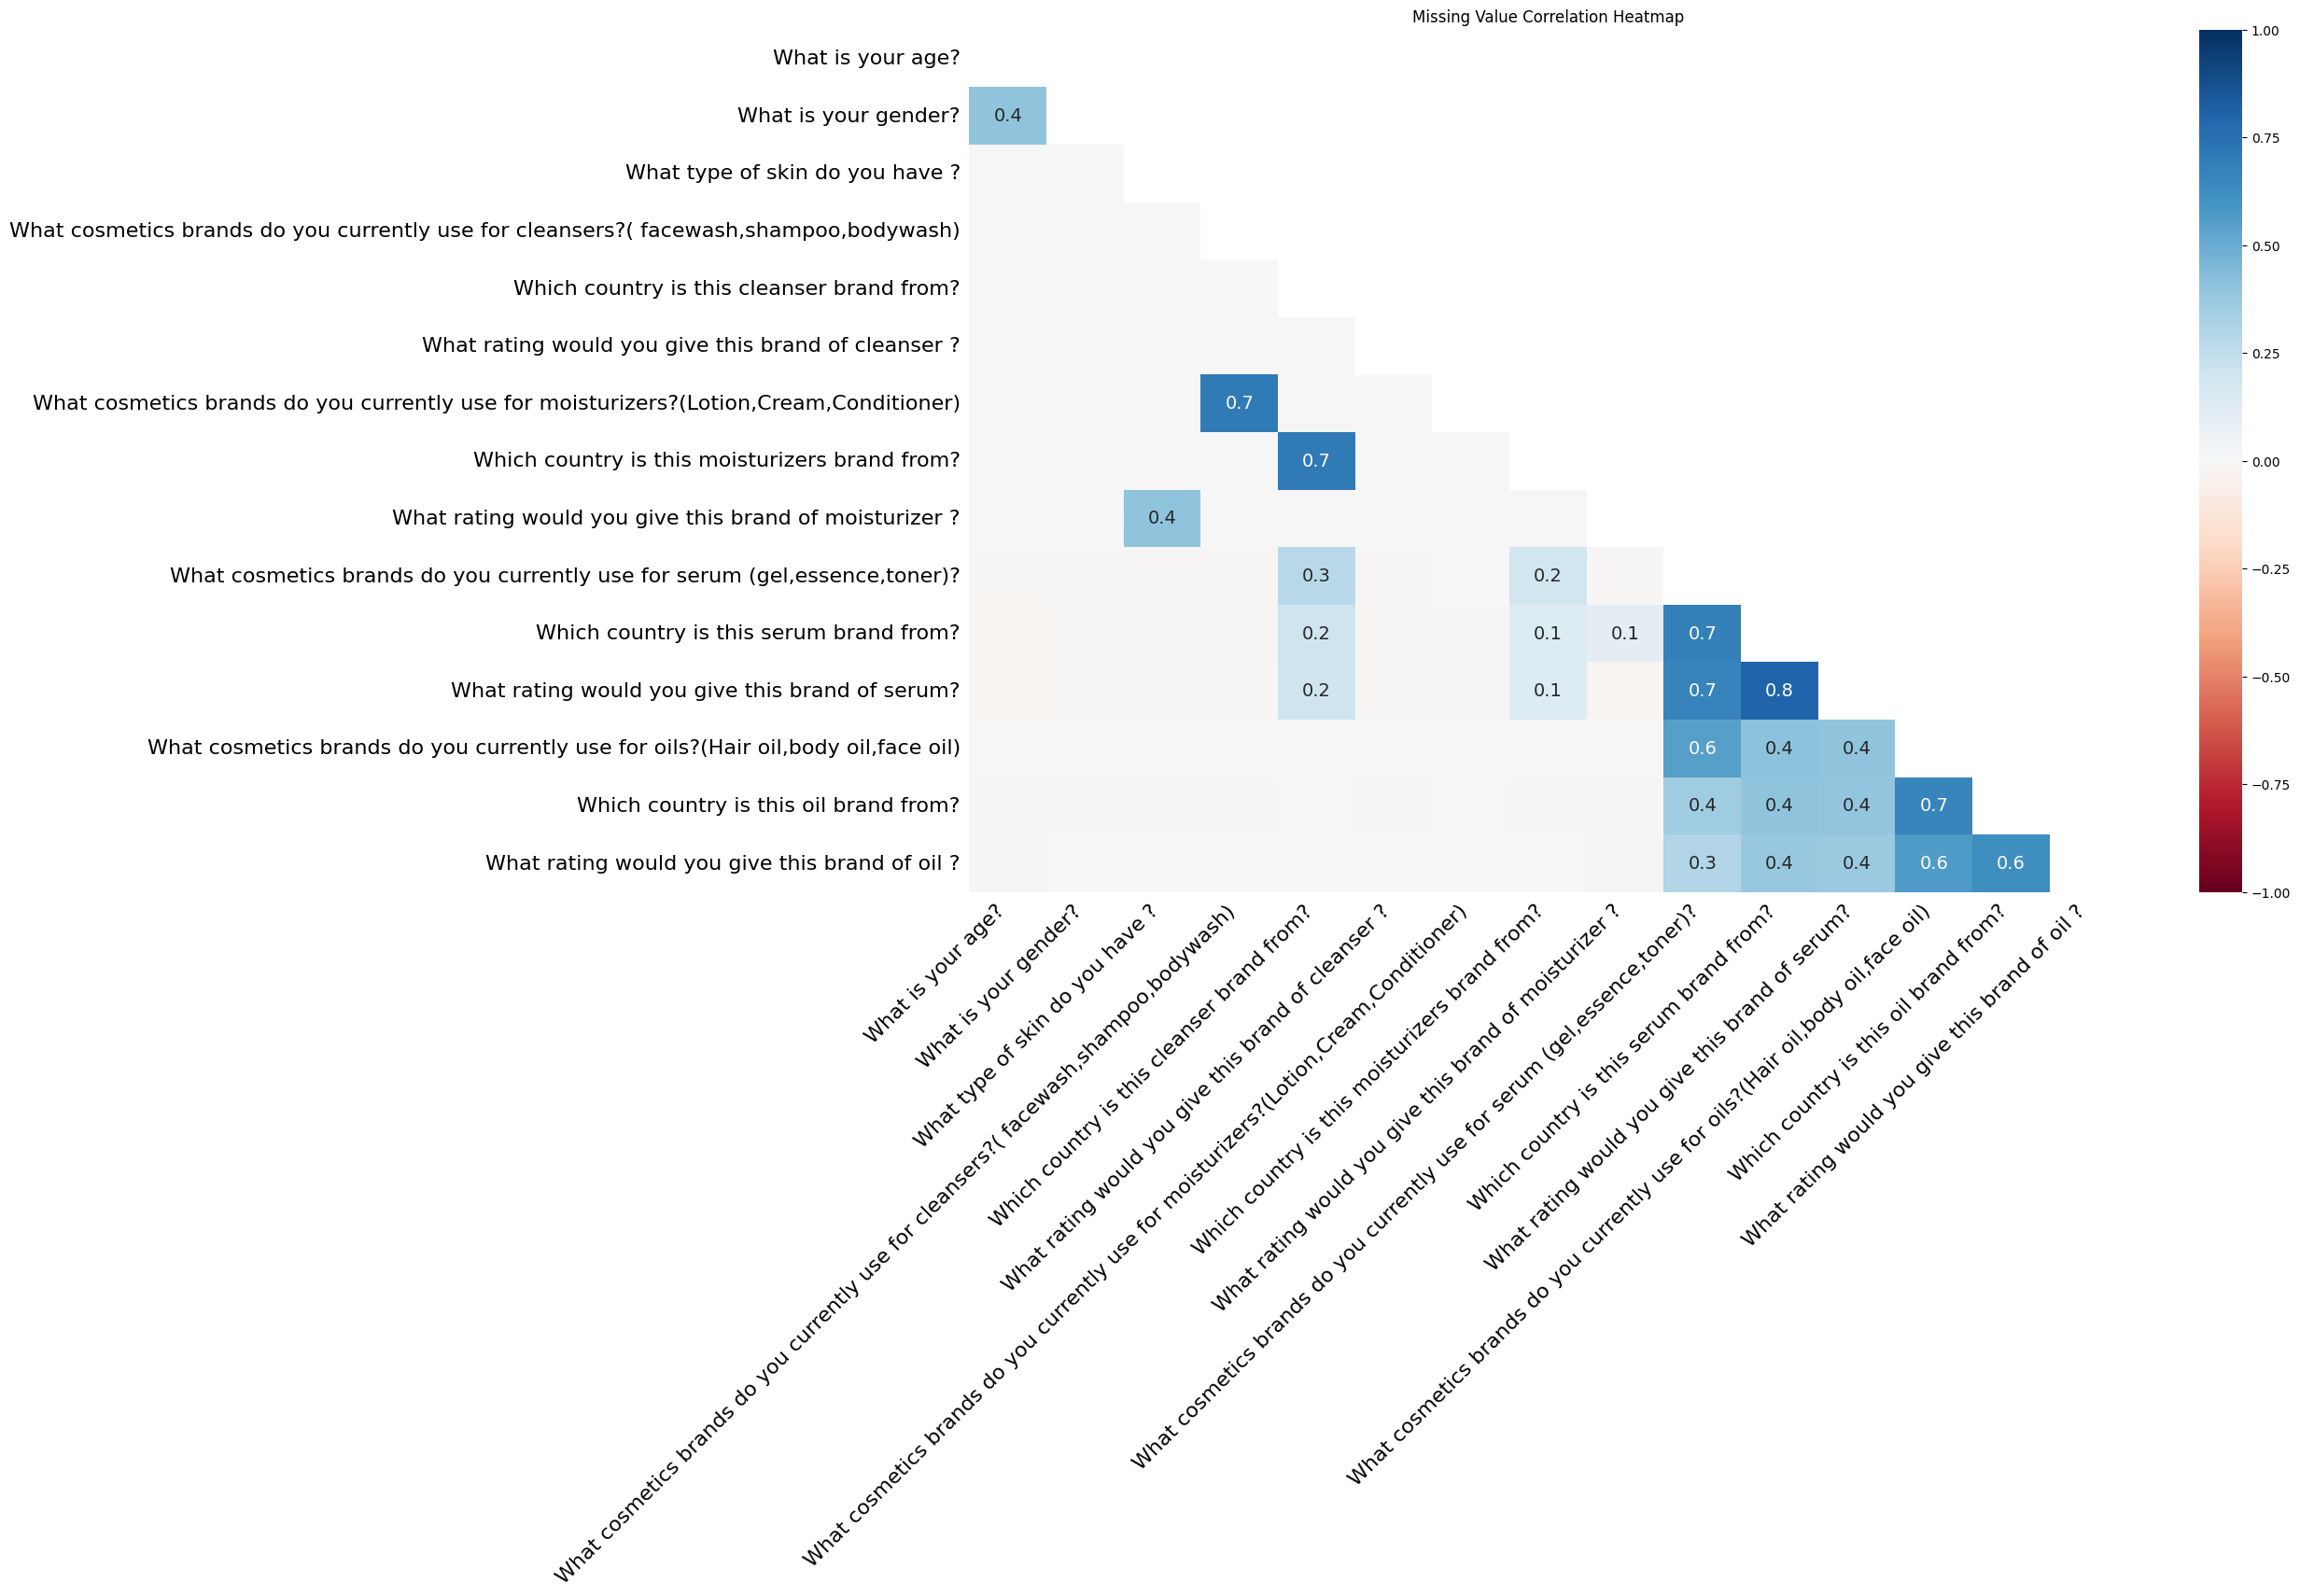

In [ ]:
# Visualize the correlation of missing values between columns
msno.heatmap(df)
plt.title('Missing Value Correlation Heatmap')
plt.show()

In [ ]:
# Calculate missing value correlation matrix
missing_corr = df.isnull().corr()

# Print the correlation matrix
print("Missing value correlation matrix:")
print(missing_corr)

Missing value correlation matrix:
                                                    What is your age?  \
What is your age?                                            1.000000   
What is your gender?                                         0.405439   
What type of skin do you have ?                             -0.004817   
What is your budget for cosmetics per month?                      NaN   
What cosmetics brands do you currently use for ...          -0.004817   
Which country is this cleanser brand from?                  -0.003403   
What rating would you give this brand of cleans...          -0.004817   
What cosmetics brands do you currently use for ...          -0.003403   
Which country is this moisturizers brand from?              -0.004817   
What rating would you give this brand of moistu...          -0.005906   
What cosmetics brands do you currently use for ...          -0.012416   
Which country is this serum brand from?                     -0.016683   
What rating would

In [ ]:
# Remove rows with any missing values
df_cleaned = df.dropna()


In [ ]:
# Impute missing values for numerical columns with mean
numerical_columns = ['What is your age?']  # Add other numerical columns if needed
for col in numerical_columns:
    df[col].fillna(df[col].mean(), inplace=True)

In [ ]:
# Impute missing values for categorical columns with mode
categorical_columns = ['What is your gender?', 'What type of skin do you have ?', 'What is your budget for cosmetics per month?',
                        'What cosmetics brands do you currently use for cleansers?( facewash,shampoo,bodywash)',
                        'Which country is this cleanser brand from?',
                        'What rating would you give this brand of cleanser ?',
                        'What cosmetics brands do you currently use for moisturizers?(Lotion,Cream,Conditioner)',
                        'Which country is this moisturizers brand from?',
                        'What rating would you give this brand of moisturizer ?',
                        'What cosmetics brands do you currently use for serum (gel,essence,toner)?',
                        'Which country is this serum brand from?',
                        'What rating would you give this brand of serum?',
                        'What cosmetics brands do you currently use for oils?(Hair oil,body oil,face oil)',
                        'Which country is this oil brand from?',
                        'What rating would you give this brand of oil ?']  # Add other categorical columns if needed
for col in categorical_columns:
    df[col].fillna(df[col].mode().iloc[0], inplace=True)


In [ ]:
# Verify that there are no missing values after imputation
print("Missing values in the dataset after imputation:")
print(df.isnull().sum())

Missing values in the dataset after imputation:
What is your age?                                                                         0
What is your gender?                                                                      0
What type of skin do you have ?                                                           0
What is your budget for cosmetics per month?                                              0
What cosmetics brands do you currently use for cleansers?( facewash,shampoo,bodywash)     0
Which country is this cleanser brand from?                                                0
What rating would you give this brand of cleanser ?                                       0
What cosmetics brands do you currently use for moisturizers?(Lotion,Cream,Conditioner)    0
Which country is this moisturizers brand from?                                            0
What rating would you give this brand of moisturizer ?                                    0
What cosmetics brands do you cur

In [ ]:

# Print the number of non-null values after handling
print("\nNumber of non-null values after handling:")
print(df.count().sum())


Number of non-null values after handling:
8176


# **Visualize Part**

# **Age Group**


Number of data in the 'What is your age?' attribute: 511


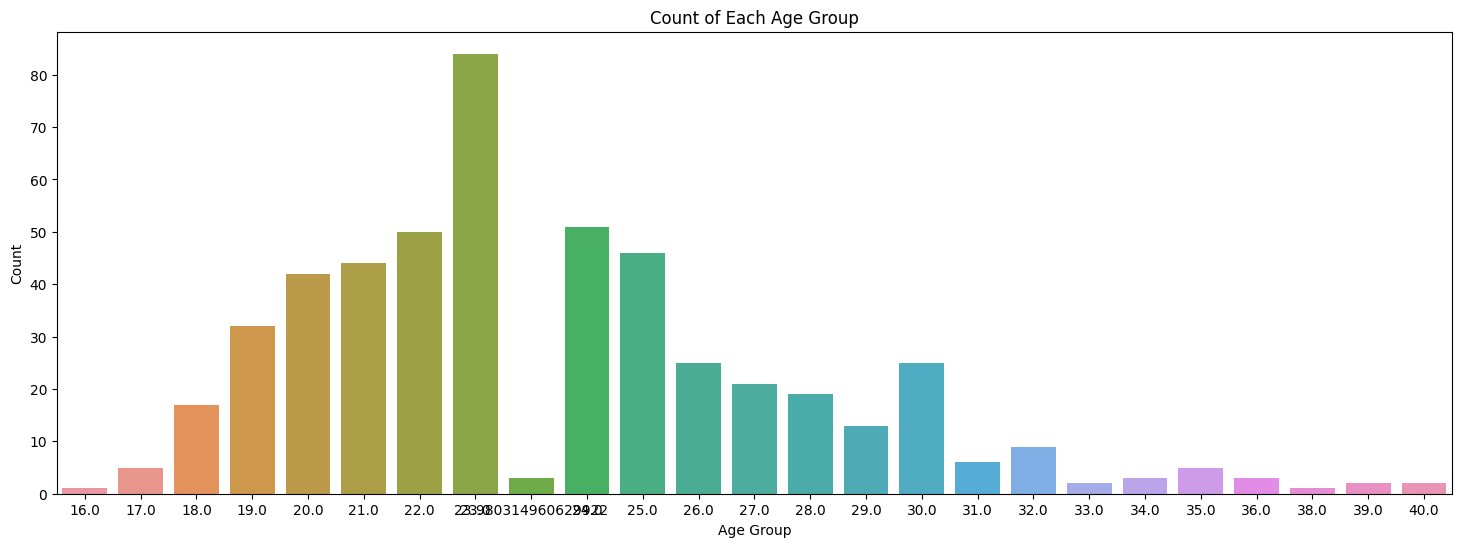

In [ ]:
# Print the number of data in the 'What is your age?' attribute
print("\nNumber of data in the 'What is your age?' attribute:", len(df['What is your age?']))

# Plot the count of each age group
plt.figure(figsize=(18, 6))
sns.countplot(x='What is your age?', data=df)
plt.title('Count of Each Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

In [ ]:
# Print the minimum and count of each age group
age_group_counts = df['What is your age?'].value_counts().reset_index()
age_group_counts.columns = ['Age Group', 'Count']
print("\nCount of each age group:")
print(age_group_counts)


Count of each age group:
    Age Group  Count
0   23.000000     84
1   24.000000     51
2   22.000000     50
3   25.000000     46
4   21.000000     44
5   20.000000     42
6   19.000000     32
7   26.000000     25
8   30.000000     25
9   27.000000     21
10  28.000000     19
11  18.000000     17
12  29.000000     13
13  32.000000      9
14  31.000000      6
15  35.000000      5
16  17.000000      5
17  23.980315      3
18  34.000000      3
19  36.000000      3
20  39.000000      2
21  33.000000      2
22  40.000000      2
23  38.000000      1
24  16.000000      1


In [ ]:
# Print the average, mean, median, and max for the 'What is your age?' attribute
print("\nAverage age:", df['What is your age?'].mean())
print("Mean age:", df['What is your age?'].mode().iloc[0])  # using mode for mean since the data is categorical
print("Median age:", df['What is your age?'].median())
print("Max age:", df['What is your age?'].max())
print("Min age:", df['What is your age?'].min())
print("Total age:", df['What is your age?'].count())
# Calculate percentage distribution
age_percentage = df['What is your age?'].value_counts(normalize=True) * 100
print("\nPercentage Distribution of Each age:")
print(age_percentage)


Average age: 23.980314960629926
Mean age: 23.0
Median age: 23.0
Max age: 40.0
Min age: 16.0
Total age: 511

Percentage Distribution of Each age:
23.000000    16.438356
24.000000     9.980431
22.000000     9.784736
25.000000     9.001957
21.000000     8.610568
20.000000     8.219178
19.000000     6.262231
26.000000     4.892368
30.000000     4.892368
27.000000     4.109589
28.000000     3.718200
18.000000     3.326810
29.000000     2.544031
32.000000     1.761252
31.000000     1.174168
35.000000     0.978474
17.000000     0.978474
23.980315     0.587084
34.000000     0.587084
36.000000     0.587084
39.000000     0.391389
33.000000     0.391389
40.000000     0.391389
38.000000     0.195695
16.000000     0.195695
Name: What is your age?, dtype: float64


# **Gender**


Number of data in the 'What is your gender?' attribute: 511


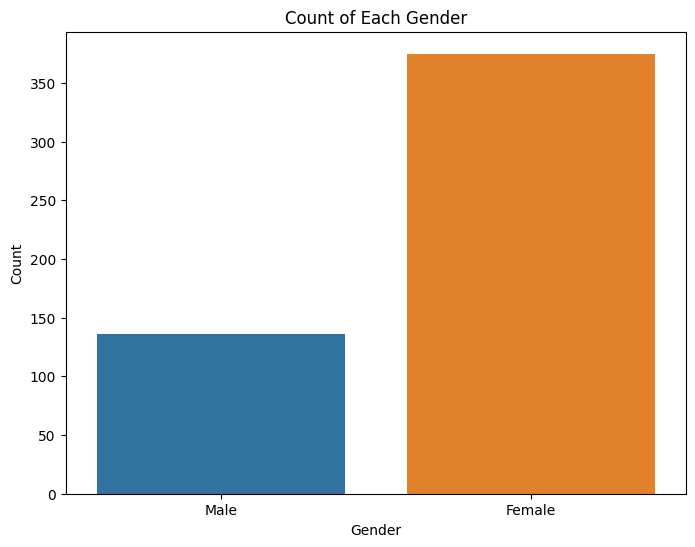

In [ ]:
# Print the number of data in the 'What is your gender?' attribute
print("\nNumber of data in the 'What is your gender?' attribute:", len(df['What is your gender?']))

# Plot the count of each gender
plt.figure(figsize=(8, 6))
sns.countplot(x='What is your gender?', data=df)
plt.title('Count of Each Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [ ]:
# Print the counts of each gender
gender_counts = df['What is your gender?'].value_counts().reset_index()
gender_counts.columns = ['Gender', 'Count']
print("\nCount of each gender:")
print(gender_counts)
# Calculate percentage distribution
gender_percentage = df['What is your gender?'].value_counts(normalize=True) * 100
print("\nPercentage Distribution of Each Gender:")
print(gender_percentage)


Count of each gender:
   Gender  Count
0  Female    375
1    Male    136

Percentage Distribution of Each Gender:
Female    73.385519
Male      26.614481
Name: What is your gender?, dtype: float64


In [ ]:
# Display summary statistics for numerical attributes by gender
numerical_attributes = ['What is your age?']  # Add other numerical attributes as needed
for attribute in numerical_attributes:
    summary_stats = df.groupby('What is your gender?')[attribute].describe()
    print(f"\nSummary Statistics for {attribute} by Gender:")
    print(summary_stats)



Summary Statistics for What is your age? by Gender:
                      count       mean       std   min   25%   50%   75%   max
What is your gender?                                                          
Female                375.0  23.677176  4.072840  16.0  21.0  23.0  26.0  40.0
Male                  136.0  24.816176  3.972502  18.0  23.0  24.0  26.0  40.0


# **Skin Type**


Number of data in the 'What type of skin do you have ?' attribute: 511


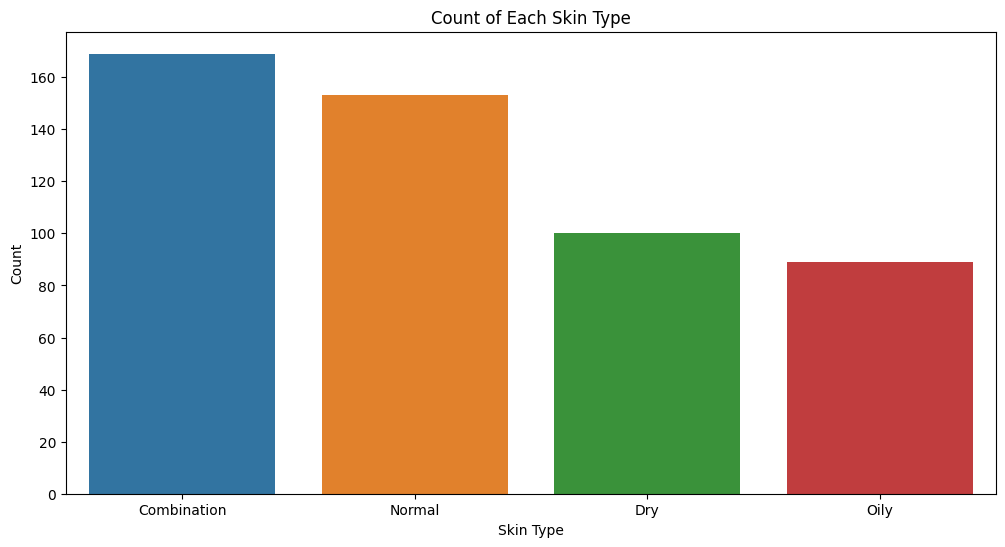

In [ ]:
# Print the number of data in the 'What type of skin do you have?' attribute
print("\nNumber of data in the 'What type of skin do you have ?' attribute:", len(df['What type of skin do you have ?']))

# Plot the count of each skin type
plt.figure(figsize=(12, 6))
sns.countplot(x='What type of skin do you have ?', data=df, order=df['What type of skin do you have ?'].value_counts().index)
plt.title('Count of Each Skin Type')
plt.xlabel('Skin Type')
plt.ylabel('Count')
plt.show()

In [ ]:
# Print the count of each skin type
skin_type_counts = df['What type of skin do you have ?'].value_counts().reset_index()
skin_type_counts.columns = ['Skin Type', 'Count']
print("\nCount of each skin type:")
print(skin_type_counts)

# Print summary statistics for the 'What type of skin do you have?' attribute
print("\nSummary Statistics for 'What type of skin do you have ?':")
print(df['What type of skin do you have ?'].describe())
# Calculate percentage distribution
skin_percentage = df['What type of skin do you have ?'].value_counts(normalize=True) * 100
print("\nPercentage Distribution of Each skin:")
print(skin_percentage)


Count of each skin type:
     Skin Type  Count
0  Combination    169
1       Normal    153
2          Dry    100
3         Oily     89

Summary Statistics for 'What type of skin do you have ?':
count             511
unique              4
top       Combination
freq              169
Name: What type of skin do you have ?, dtype: object

Percentage Distribution of Each skin:
Combination    33.072407
Normal         29.941292
Dry            19.569472
Oily           17.416830
Name: What type of skin do you have ?, dtype: float64


# **Budget**

In [ ]:
# Explore 'What is your budget for cosmetics per month?' attribute
budget_column = 'What is your budget for cosmetics per month?'

# Print general information about the budget attribute
print("\nSummary for the 'What is your budget for cosmetics per month?' attribute:")
print(df[budget_column].describe())



Summary for the 'What is your budget for cosmetics per month?' attribute:
count           511
unique           31
top       1000-5000
freq            261
Name: What is your budget for cosmetics per month?, dtype: object


In [ ]:
# Remove rows with non-numeric budget values
df_cleaned_budget = df[df[budget_column].apply(lambda x: str(x).replace('.', '', 1).isdigit())]


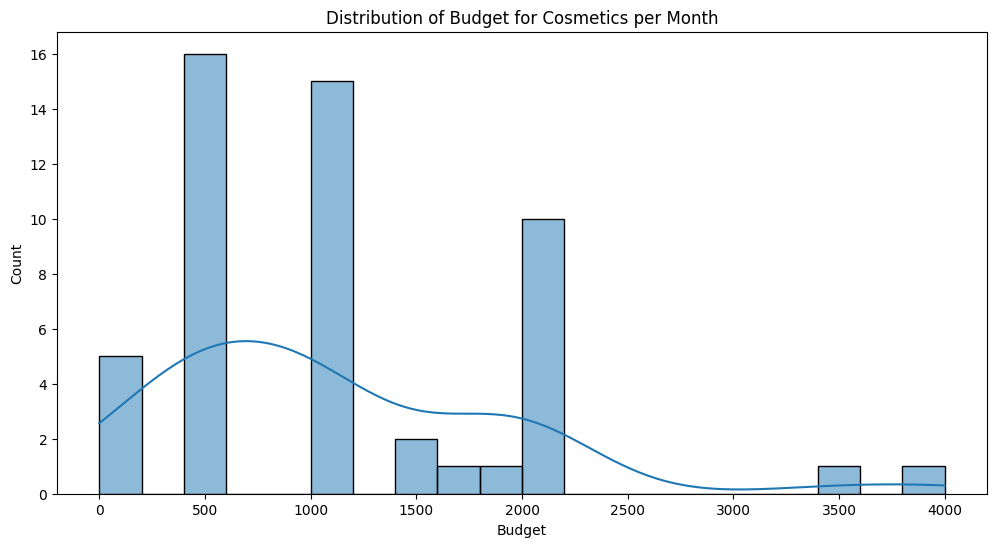


Count of each budget category:
            Budget Category  Count
0                 1000-5000    261
1                  100-1000    150
2                5000-10000     29
3                      1000     15
4                       500     15
5                      2000     10
6                 5000-1000      4
7                       100      3
8                      1500      2
9                       400      1
10                1500-2000      1
11                   1k- 2k      1
12                     1700      1
13                       4k      1
14                     4000      1
15                  No idea      1
16  Under 10 thousand taka       1
17                       3k      1
18                     3500      1
19                  No else      1
20              2000minimum      1
21                  500-600      1
22                       00      1
23              It depends       1
24                    4/5 k      1
25               200 to 500      1
26                     

In [ ]:
# Plot the distribution of cleaned budget values
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned_budget[budget_column].astype(float), bins=20, kde=True)
plt.title('Distribution of Budget for Cosmetics per Month')
plt.xlabel('Budget')
plt.ylabel('Count')
plt.show()
# Print the count of each budget category
budget_counts = df[budget_column].value_counts().reset_index()
budget_counts.columns = ['Budget Category', 'Count']
print("\nCount of each budget category:")
print(budget_counts)

In [ ]:
# Remove rows with non-numeric budget values
df_cleaned_budget = df[df[budget_column].apply(lambda x: str(x).replace('.', '', 1).isdigit())]

# Convert the budget column to numeric
df_cleaned_budget[budget_column] = pd.to_numeric(df_cleaned_budget[budget_column], errors='coerce')


<ipython-input-29-1923380ae404>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_budget[budget_column] = pd.to_numeric(df_cleaned_budget[budget_column], errors='coerce')


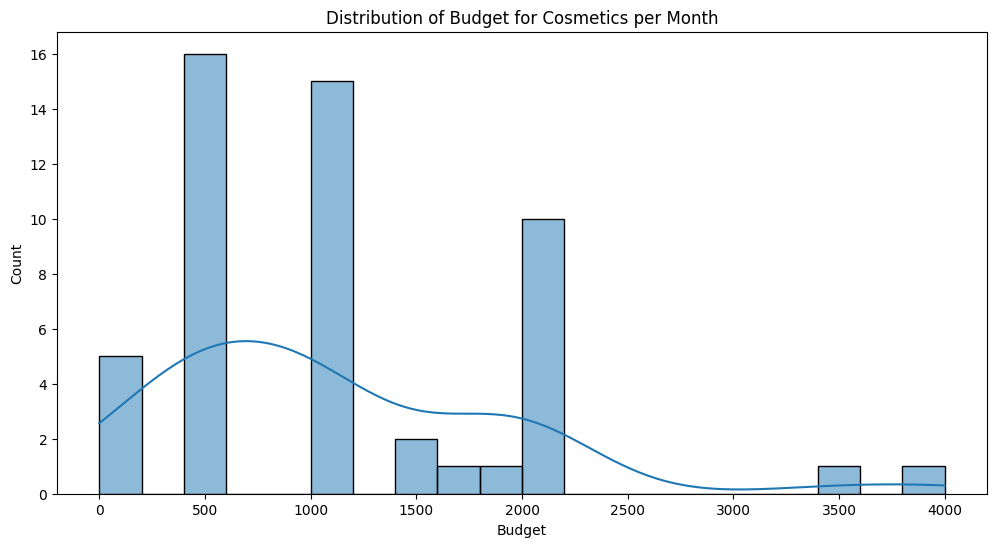


Average budget: 1100.0
Median budget: 1000.0


In [ ]:
# Plot the distribution of cleaned budget values
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned_budget[budget_column], bins=20, kde=True)
plt.title('Distribution of Budget for Cosmetics per Month')
plt.xlabel('Budget')
plt.ylabel('Count')
plt.show()

# Print the average and median budget
print("\nAverage budget:", df_cleaned_budget[budget_column].mean())
print("Median budget:", df_cleaned_budget[budget_column].median())

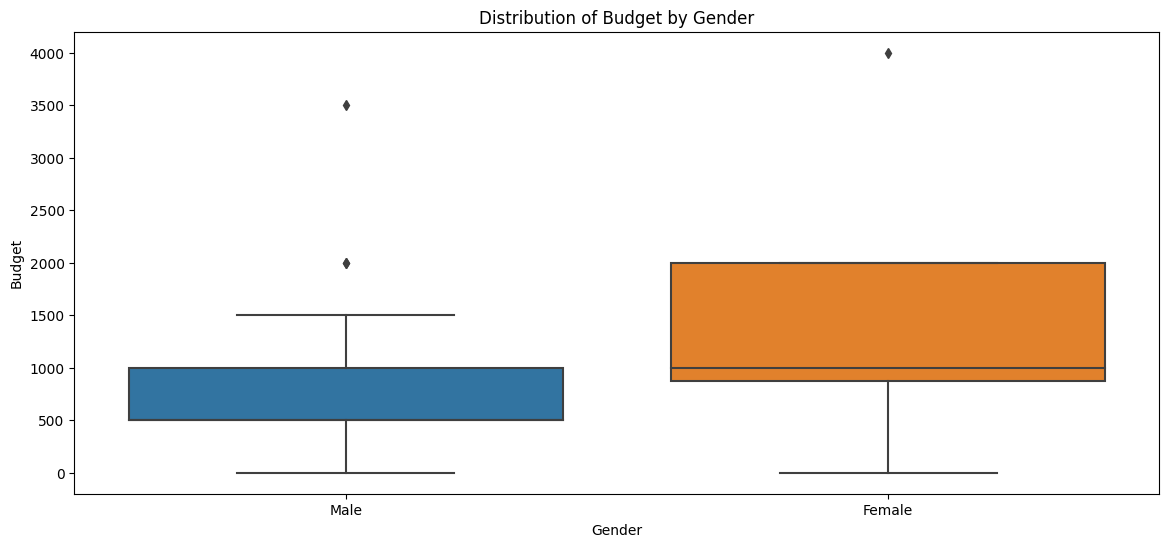

In [ ]:
# Clean the budget column
budget_column = 'What is your budget for cosmetics per month?'
df_cleaned_budget = df.copy()
df_cleaned_budget[budget_column] = pd.to_numeric(df_cleaned_budget[budget_column], errors='coerce')

# Plot the distribution of budget by gender
plt.figure(figsize=(14, 6))
sns.boxplot(x='What is your gender?', y=budget_column, data=df_cleaned_budget)
plt.title('Distribution of Budget by Gender')
plt.xlabel('Gender')
plt.ylabel('Budget')
plt.show()



# **What cosmetics brands do you currently use for cleansers?( facewash,shampoo,bodywash)**


Information about the attribute: What cosmetics brands do you currently use for cleansers?( facewash,shampoo,bodywash)
count       511
unique       87
top       Nivea
freq         47
Name: What cosmetics brands do you currently use for cleansers?( facewash,shampoo,bodywash), dtype: object


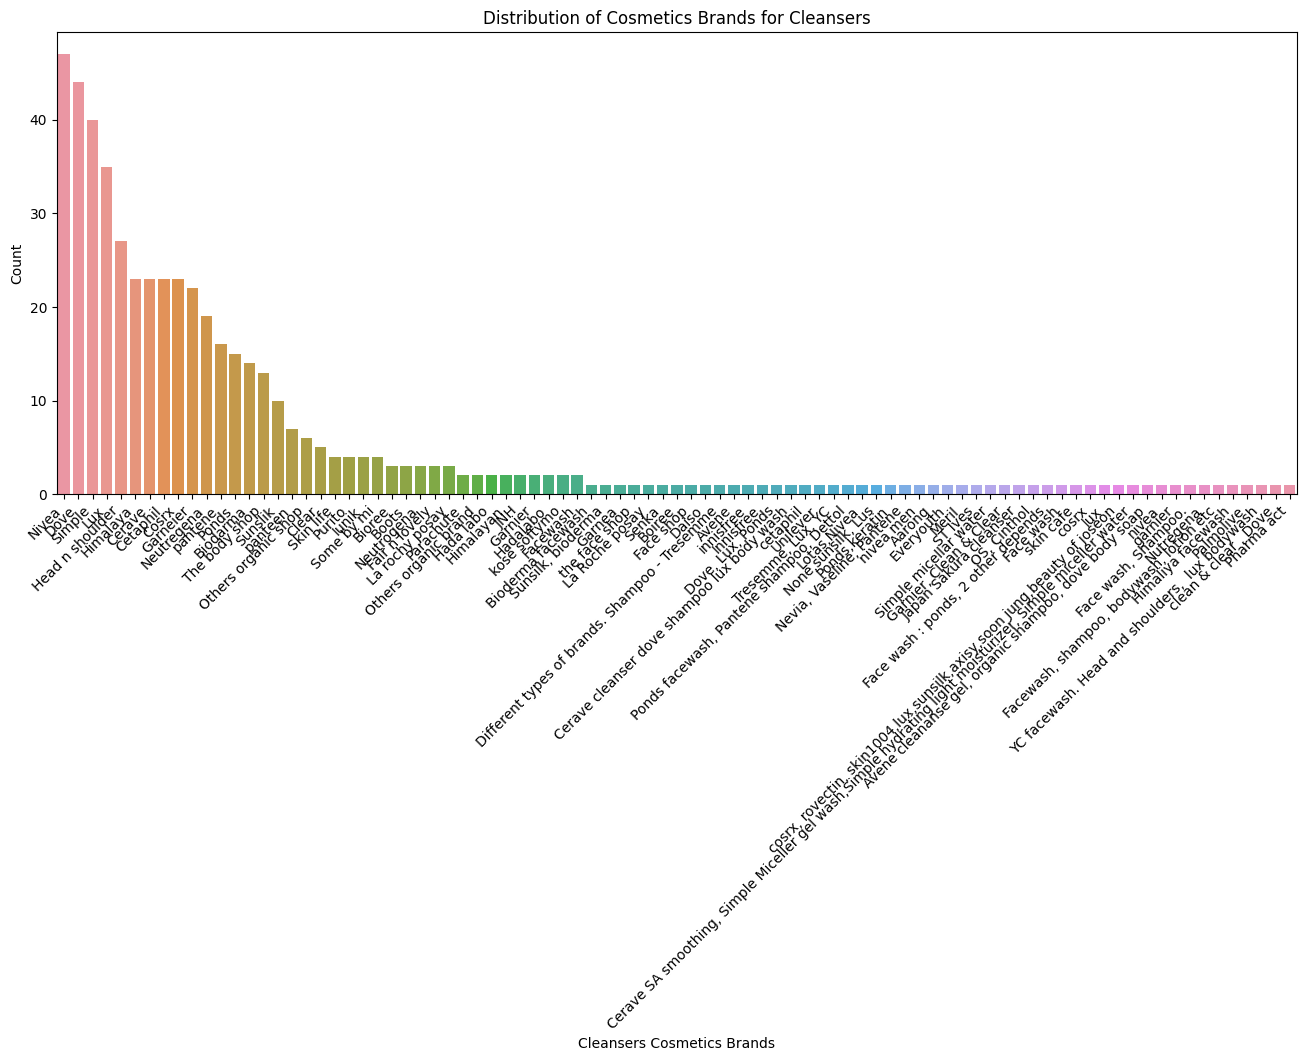

In [ ]:
# Print information about the attribute
cleansers_attribute = 'What cosmetics brands do you currently use for cleansers?( facewash,shampoo,bodywash)'
print("\nInformation about the attribute:", cleansers_attribute)
print(df[cleansers_attribute].describe())

# Visualize the distribution of cleanser brands
plt.figure(figsize=(16, 6))
sns.countplot(x=cleansers_attribute, data=df, order=df[cleansers_attribute].value_counts().index)
plt.title('Distribution of Cosmetics Brands for Cleansers')
plt.xlabel('Cleansers Cosmetics Brands')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:

# Print each value along with its count in the cleansers attribute
cleansers_column = 'What cosmetics brands do you currently use for cleansers?( facewash,shampoo,bodywash)'
print("\nInformation about the attribute:", cleansers_column)
print(df[cleansers_column].describe())
cleansers_counts = df[cleansers_column].value_counts()

print("\nCount of each value in the cleansers attribute:")
for value, count in cleansers_counts.items():
    print(f"{value}: {count}")



Information about the attribute: What cosmetics brands do you currently use for cleansers?( facewash,shampoo,bodywash)
count       511
unique       87
top       Nivea
freq         47
Name: What cosmetics brands do you currently use for cleansers?( facewash,shampoo,bodywash), dtype: object

Count of each value in the cleansers attribute:
Nivea: 47
Dove: 44
Simple: 40
Lux: 35
Head n shoulder: 27
Himalaya: 23
Cerave: 23
Cetaphil: 23
Cosrx: 23
Garneier: 22
Neutregena: 19
pantene: 16
Ponds: 15
Biodarma: 14
The body shop: 13
Sunslik: 10
panteen: 7
Others organic shop: 6
Clear: 5
Skin life: 4
Purito: 4
Iunik: 4
Some by mi: 4
Bioree: 3
Boots: 3
Neutrogena: 3
Fair n lovely: 3
La rochy posay: 3
Parachute: 2
Others organic brand: 2
Hada labo: 2
Himalayan: 2
JNH: 2
Garnier: 2
Hadalabo: 2
kose softymo: 2
Facewash: 2
Bioderma facewash: 1
Sunsilk, bioderma: 1
Garnea: 1
the face shop: 1
La Roche posay: 1
Senka: 1
Boiree: 1
Face shop: 1
Daiso: 1
Different types of brands. Shampoo - Tresemme: 1
Avene: 

In [ ]:
# Calculate percentage distribution
percentage = df['What cosmetics brands do you currently use for cleansers?( facewash,shampoo,bodywash)'].value_counts(normalize=True) * 100
print("\nPercentage Distribution of Each cleansers:")
print(percentage)


Percentage Distribution of Each cleansers:
Nivea                                             9.197652
Dove                                              8.610568
Simple                                            7.827789
Lux                                               6.849315
Head n shoulder                                   5.283757
                                                    ...   
Himaliya facewash                                 0.195695
Palmolive                                         0.195695
YC facewash. Head and shoulders,  lux bodywash    0.195695
clean & clear , Dove                              0.195695
Pharma act                                        0.195695
Name: What cosmetics brands do you currently use for cleansers?( facewash,shampoo,bodywash), Length: 87, dtype: float64


# **Which country is this cleanser brand from?**

In [ ]:
cleanser_country_attribute = 'Which country is this cleanser brand from?'
print("\nInformation about the attribute:", cleanser_country_attribute)
print(df[cleanser_country_attribute].describe())
cleanser_country_counts = df[cleanser_country_attribute].value_counts().reset_index()
cleanser_country_counts.columns = ['Country', 'Count']
print("\nCount of each unique value in the cleanser country attribute:")
print(cleanser_country_counts)



Information about the attribute: Which country is this cleanser brand from?
count        511
unique        16
top       12.USA
freq         134
Name: Which country is this cleanser brand from?, dtype: object

Count of each unique value in the cleanser country attribute:
         Country  Count
0         12.USA    134
1        2.India    102
2        5.Korea     63
3   1.Bangladesh     60
4       8.France     46
5      9.Germany     39
6       13.Japan     18
7     11.England     16
8     3.Thailand     13
9       10.Italy      7
10       7.Spain      4
11  14.Australia      3
12       4.China      2
13            Uk      2
14    6.Pakistan      1
15            UK      1


In [ ]:
most_common_country = cleanser_country_counts.iloc[0]['Country']
highest_count = cleanser_country_counts.iloc[0]['Count']

print("\nSummary Statistics:")
print("Most common country:", most_common_country)
print("Country with the highest count:", most_common_country, "with count:", highest_count)



Summary Statistics:
Most common country: 12.USA
Country with the highest count: 12.USA with count: 134


In [ ]:
# Calculate percentage distribution
percentage = df['Which country is this cleanser brand from?'].value_counts(normalize=True) * 100
print("\nPercentage Distribution of Each Country:")
print(percentage)


Percentage Distribution of Each Country:
12.USA          26.223092
2.India         19.960861
5.Korea         12.328767
1.Bangladesh    11.741683
8.France         9.001957
9.Germany        7.632094
13.Japan         3.522505
11.England       3.131115
3.Thailand       2.544031
10.Italy         1.369863
7.Spain          0.782779
14.Australia     0.587084
4.China          0.391389
Uk               0.391389
6.Pakistan       0.195695
UK               0.195695
Name: Which country is this cleanser brand from?, dtype: float64


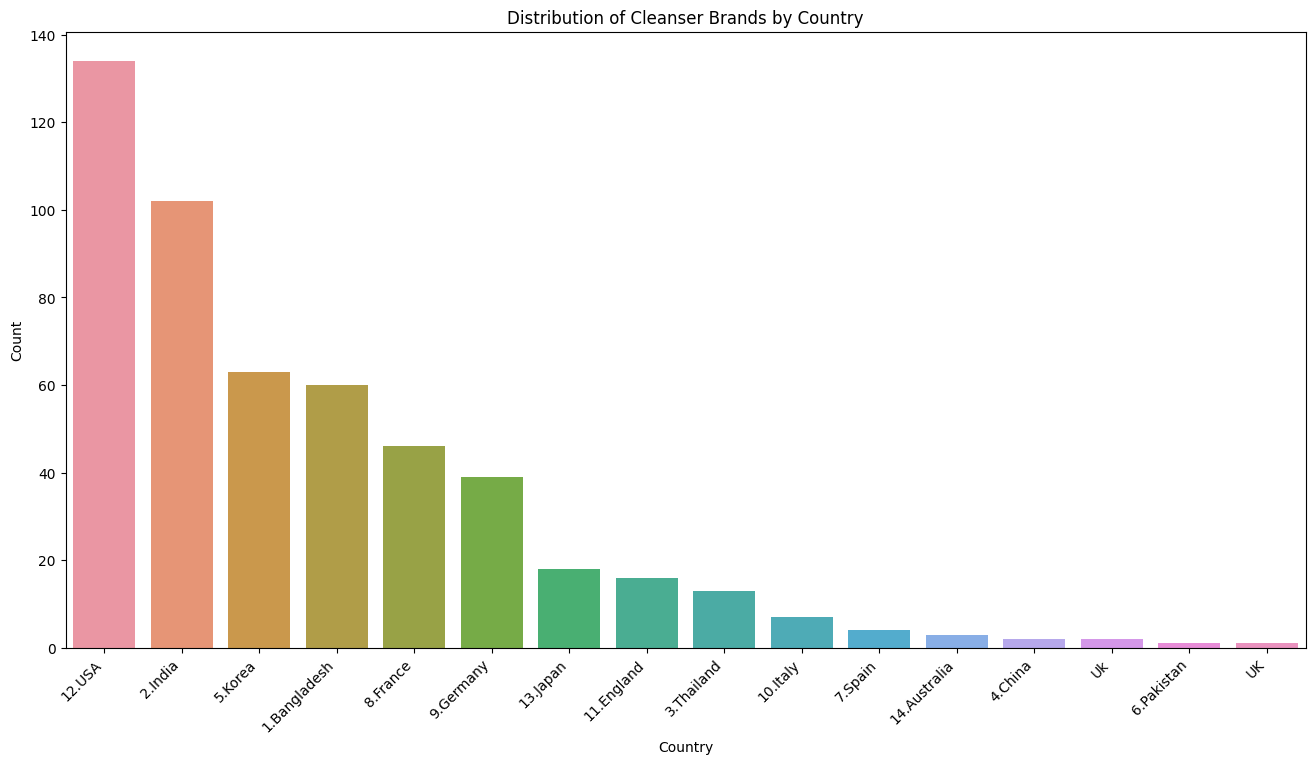

In [ ]:
plt.figure(figsize=(16, 8))
sns.countplot(x=cleanser_country_attribute, data=df, order=df[cleanser_country_attribute].value_counts().index)
plt.title('Distribution of Cleanser Brands by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


# **What rating would you give this brand of cleanser ?**


Information about the attribute: What rating would you give this brand of cleanser ?
count      511
unique       4
top       Good
freq       310
Name: What rating would you give this brand of cleanser ?, dtype: object


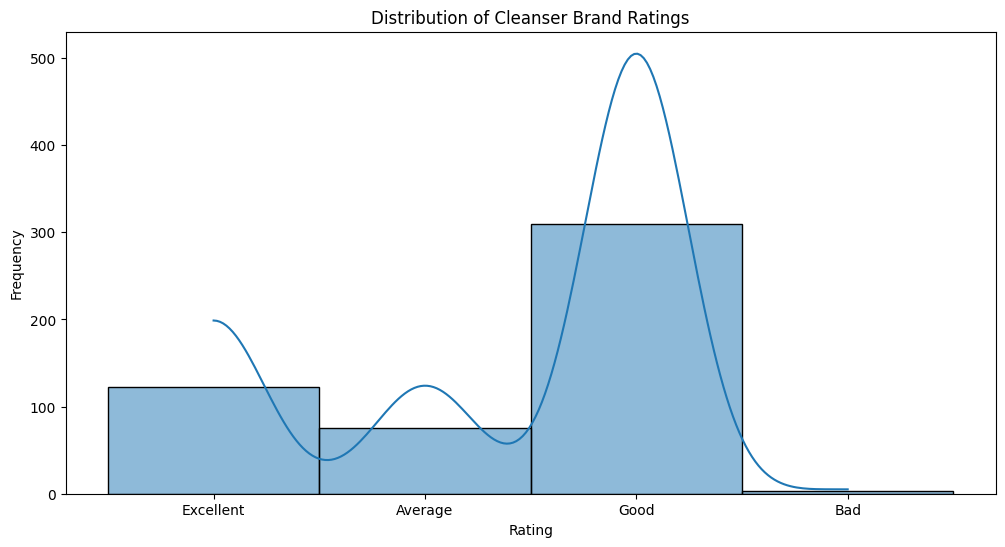

In [ ]:
# Information about the attribute: What rating would you give this brand of cleanser?
cleanser_rating_attribute = 'What rating would you give this brand of cleanser ?'
print("\nInformation about the attribute:", cleanser_rating_attribute)
print(df[cleanser_rating_attribute].describe())

# Visualize the distribution of cleanser ratings
plt.figure(figsize=(12, 6))
sns.histplot(df[cleanser_rating_attribute].dropna(), bins=10, kde=True)
plt.title('Distribution of Cleanser Brand Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# **What cosmetics brands do you currently use for moisturizers?(Lotion,Cream,Conditioner)**


Information about the attribute: What cosmetics brands do you currently use for moisturizers?(Lotion,Cream,Conditioner)
count       511
unique       90
top       Ponds
freq         67
Name: What cosmetics brands do you currently use for moisturizers?(Lotion,Cream,Conditioner), dtype: object


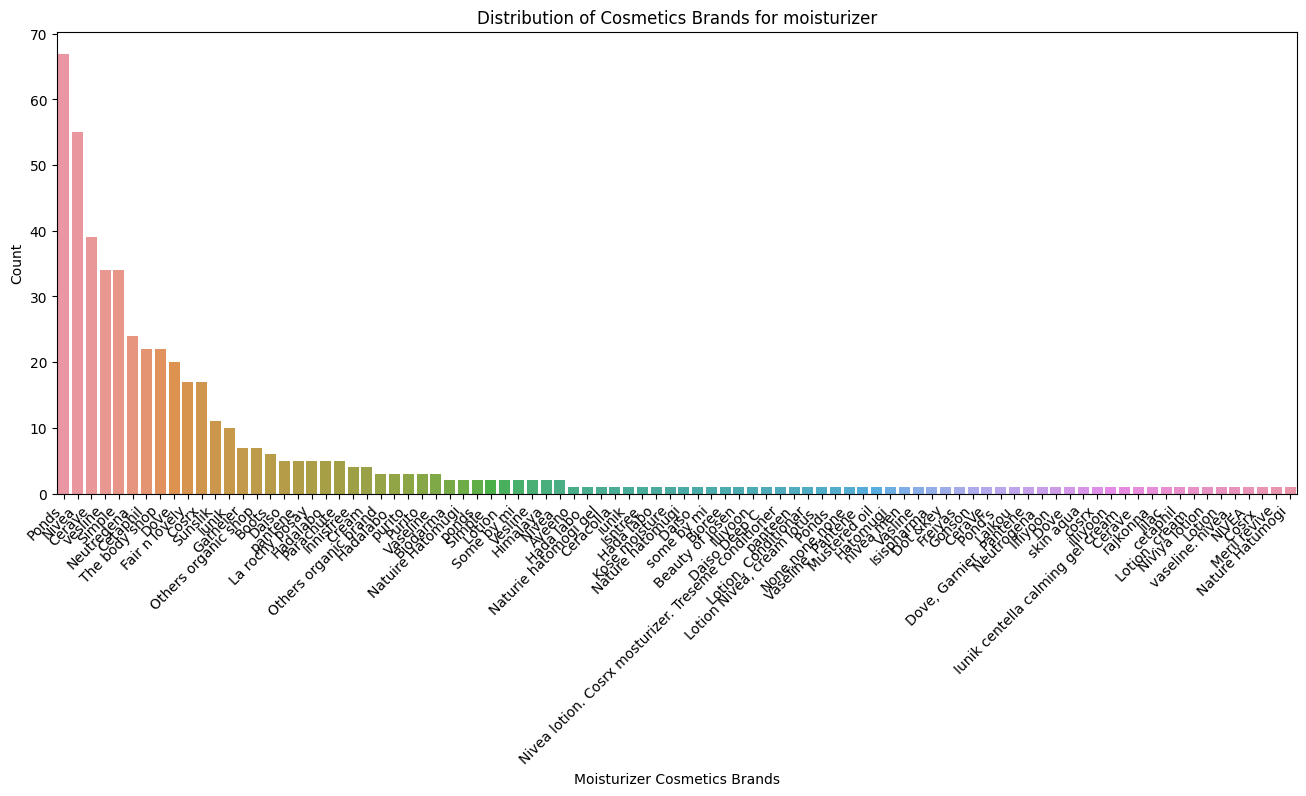

In [ ]:
# Print information about the attribute
moisturizer_attribute = 'What cosmetics brands do you currently use for moisturizers?(Lotion,Cream,Conditioner)'
print("\nInformation about the attribute:", moisturizer_attribute)
print(df[moisturizer_attribute].describe())

# Visualize the distribution of  moisturizers brands
plt.figure(figsize=(16, 6))
sns.countplot(x=moisturizer_attribute, data=df, order=df[moisturizer_attribute].value_counts().index)
plt.title('Distribution of Cosmetics Brands for moisturizer')
plt.xlabel('Moisturizer Cosmetics Brands')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# Print each value along with its count in the  moisturizers attribute
moisturizers_column = 'What cosmetics brands do you currently use for moisturizers?(Lotion,Cream,Conditioner)'
print("\nInformation about the attribute:", moisturizers_column)
print(df[moisturizers_column].describe())
moisturizers_counts = df[moisturizers_column].value_counts()

print("\nCount of each value in the  moisturizers brand attribute:")
for value, count in moisturizers_counts.items():
    print(f"{value}: {count}")


Information about the attribute: What cosmetics brands do you currently use for moisturizers?(Lotion,Cream,Conditioner)
count       511
unique       90
top       Ponds
freq         67
Name: What cosmetics brands do you currently use for moisturizers?(Lotion,Cream,Conditioner), dtype: object

Count of each value in the  moisturizers brand attribute:
Ponds: 67
Nivea: 55
Cerave: 39
vesline: 34
Simple: 34
Neutregena: 24
Cetaphil: 22
The body shop: 22
Dove: 20
Fair n lovely: 17
Cosrx: 17
Sunslik: 11
Iunik: 10
Garneier: 7
Others organic shop: 7
Boots: 6
Daiso: 5
pantene: 5
La rochy posay: 5
Hadalabo: 5
Parachute: 5
Innisfree: 4
Cream: 4
Others organic brand: 3
Hadalabo : 3
purito: 3
Purito: 3
Vaseline : 3
Biodarma: 2
Natuire Hatomugi: 2
ponds: 2
Simple : 2
Lotion : 2
Some by mi: 2
Vesline: 2
Himalaya: 2
Nivea : 2
Aveeno: 1
Hada labo : 1
Naturie hatomogi gel: 1
Ceracolla: 1
iunik: 1
Isntree: 1
Hada labo: 1
Kose moisture: 1
Nature hatomugi: 1
Daiso : 1
some by mi: 1
Bioree: 1
Beauty of josen:

In [ ]:
# Calculate percentage distribution
percentage = df['What cosmetics brands do you currently use for moisturizers?(Lotion,Cream,Conditioner)'].value_counts(normalize=True) * 100
print("\nPercentage Distribution of Each moisturizers brand:")
print(percentage)


Percentage Distribution of Each moisturizers brand:
Ponds               13.111546
Nivea               10.763209
Cerave               7.632094
vesline              6.653620
Simple               6.653620
                      ...    
vaseline. nivea,     0.195695
NIVEA                0.195695
Cosrx                0.195695
Meril revive         0.195695
Nature Hatumogi      0.195695
Name: What cosmetics brands do you currently use for moisturizers?(Lotion,Cream,Conditioner), Length: 90, dtype: float64


# **Which country is this moisturizers brand from?**

In [ ]:
# Moisturizer Country Attribute
moisturizer_country_attribute = 'Which country is this moisturizers brand from?'
print("\nInformation about the attribute:", moisturizer_country_attribute)
print(df[moisturizer_country_attribute].describe())

# Count occurrences of each country, including missing values
moisturizer_country_counts = df[moisturizer_country_attribute].value_counts().reset_index()
moisturizer_country_counts.columns = ['Country', 'Count']

# Print count of each unique value in the moisturizer country attribute
print("\nCount of each unique value in the moisturizer country attribute:")
print(moisturizer_country_counts)



Information about the attribute: Which country is this moisturizers brand from?
count        511
unique        19
top       12.USA
freq         138
Name: Which country is this moisturizers brand from?, dtype: object

Count of each unique value in the moisturizer country attribute:
         Country  Count
0         12.USA    138
1        2.India    109
2        5.Korea     69
3   1.Bangladesh     49
4      9.Germany     41
5       13.Japan     29
6     11.England     23
7       8.France     18
8     3.Thailand     12
9        7.Spain      6
10            Uk      5
11  14.Australia      3
12       4.China      3
13        Poland      1
14     15.Canada      1
15    6.Pakistan      1
16      10.Italy      1
17            UK      1
18       America      1



Summary Statistics:
Most common country: 12.USA
Country with the highest count: 12.USA with count: 138


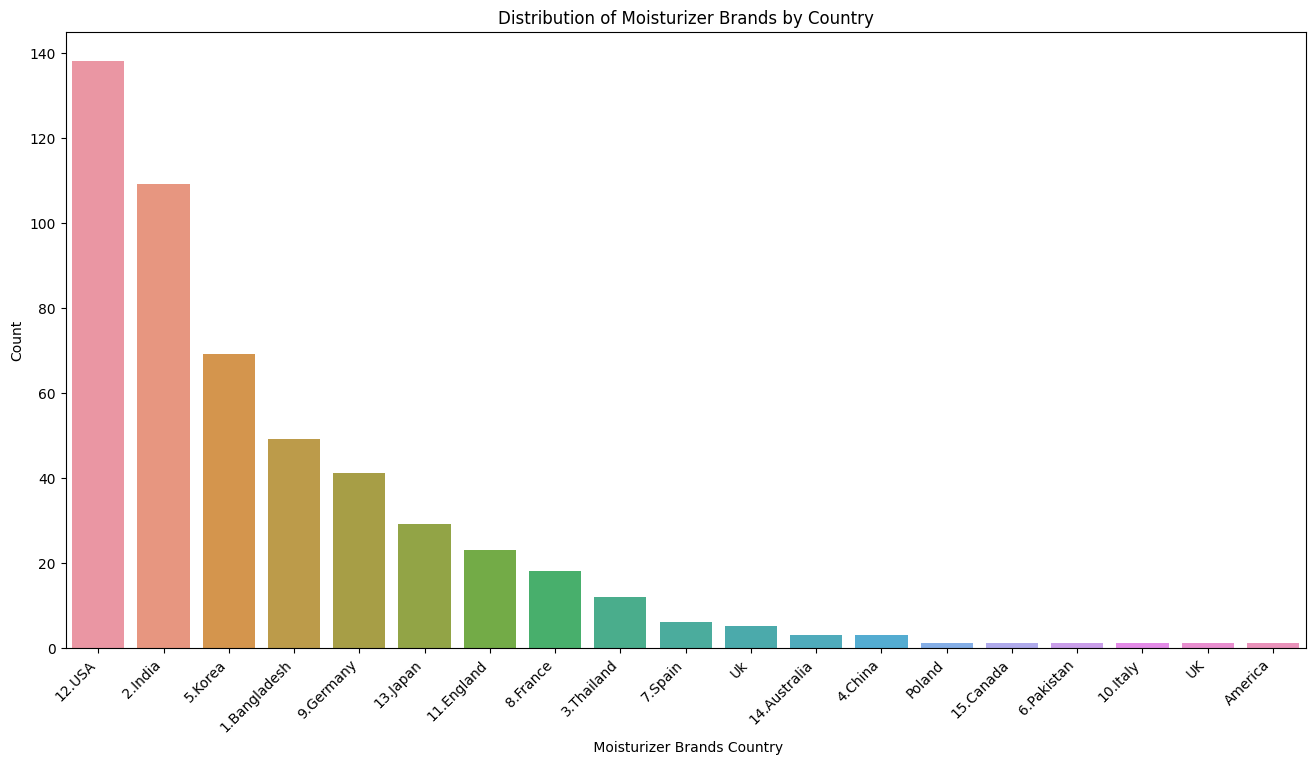

In [ ]:
# Summary Statistics
most_common_country = moisturizer_country_counts.iloc[0]['Country']
highest_count = moisturizer_country_counts.iloc[0]['Count']

print("\nSummary Statistics:")
print("Most common country:", most_common_country)
print("Country with the highest count:", most_common_country, "with count:", highest_count)
# Visualize the distribution of moisturizer brands by country
plt.figure(figsize=(16, 8))
sns.countplot(x=moisturizer_country_attribute, data=df, order=df[moisturizer_country_attribute].value_counts().index)
plt.title('Distribution of Moisturizer Brands by Country')
plt.xlabel(' Moisturizer Brands Country')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# Calculate percentage distribution
percentage = df['Which country is this moisturizers brand from?'].value_counts(normalize=True) * 100
print("\nPercentage Distribution of Each moisturizers brand by country:")
print(percentage)


Percentage Distribution of Each moisturizers brand by country:
12.USA          27.005871
2.India         21.330724
5.Korea         13.502935
1.Bangladesh     9.589041
9.Germany        8.023483
13.Japan         5.675147
11.England       4.500978
8.France         3.522505
3.Thailand       2.348337
7.Spain          1.174168
Uk               0.978474
14.Australia     0.587084
4.China          0.587084
Poland           0.195695
15.Canada        0.195695
6.Pakistan       0.195695
10.Italy         0.195695
UK               0.195695
America          0.195695
Name: Which country is this moisturizers brand from?, dtype: float64


# **What rating would you give this brand of moisturizer ?**

In [ ]:
# Information about the attribute: What rating would you give this brand of moisturizer ?
moisturizer_attribute = 'What rating would you give this brand of moisturizer ?'
print("\nInformation about the attribute:", moisturizer_attribute)
print(df[moisturizer_attribute].describe())

# Count occurrences of each value, including missing values
moisturizer_attribute_counts = df[moisturizer_attribute].value_counts().reset_index()
moisturizer_attribute_counts.columns = ['Value', 'Count']

# Print count of each unique value in the moisturizer attribute
print("\nCount of each unique value in the", moisturizer_attribute, "attribute:")
print(moisturizer_attribute_counts)


Information about the attribute: What rating would you give this brand of moisturizer ?
count      511
unique       4
top       Good
freq       306
Name: What rating would you give this brand of moisturizer ?, dtype: object

Count of each unique value in the What rating would you give this brand of moisturizer ? attribute:
       Value  Count
0       Good    306
1  Excellent    112
2    Average     90
3        Bad      3



Summary Statistics:
Most common value: Good
Value with the highest count: Good with count: 306


<Axes: xlabel='What rating would you give this brand of moisturizer ?', ylabel='Count'>

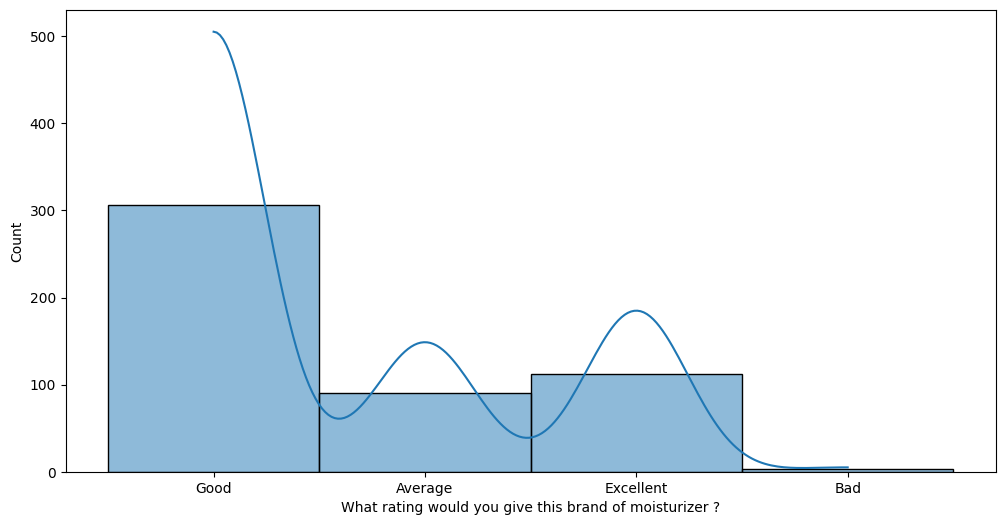

In [ ]:
# Summary Statistics
most_common_value = moisturizer_attribute_counts.iloc[0]['Value']
highest_count = moisturizer_attribute_counts.iloc[0]['Count']

print("\nSummary Statistics:")
print("Most common value:", most_common_value)
print("Value with the highest count:", most_common_value, "with count:", highest_count)
# Information about the attribute: What rating would you give this brand of moisturizer?
rating_attribute = 'What rating would you give this brand of moisturizer ?'


# Visualize the distribution of moisturizer ratings
plt.figure(figsize=(12, 6))
sns.histplot(df[rating_attribute].dropna(), bins=10, kde=True)


In [ ]:
# Calculate percentage distribution
percentage = df['What rating would you give this brand of moisturizer ?'].value_counts(normalize=True) * 100
print("\nPercentage Distribution of Each moisturizers brand Rank:")
print(percentage)


Percentage Distribution of Each moisturizers brand Rank:
Good         59.882583
Excellent    21.917808
Average      17.612524
Bad           0.587084
Name: What rating would you give this brand of moisturizer ?, dtype: float64


# **What cosmetics brands do you currently use for serum (gel,essence,toner)?**


Information about the attribute: What cosmetics brands do you currently use for serum (gel,essence,toner)?
count        511
unique        80
top       Cerave
freq          65
Name: What cosmetics brands do you currently use for serum (gel,essence,toner)?, dtype: object


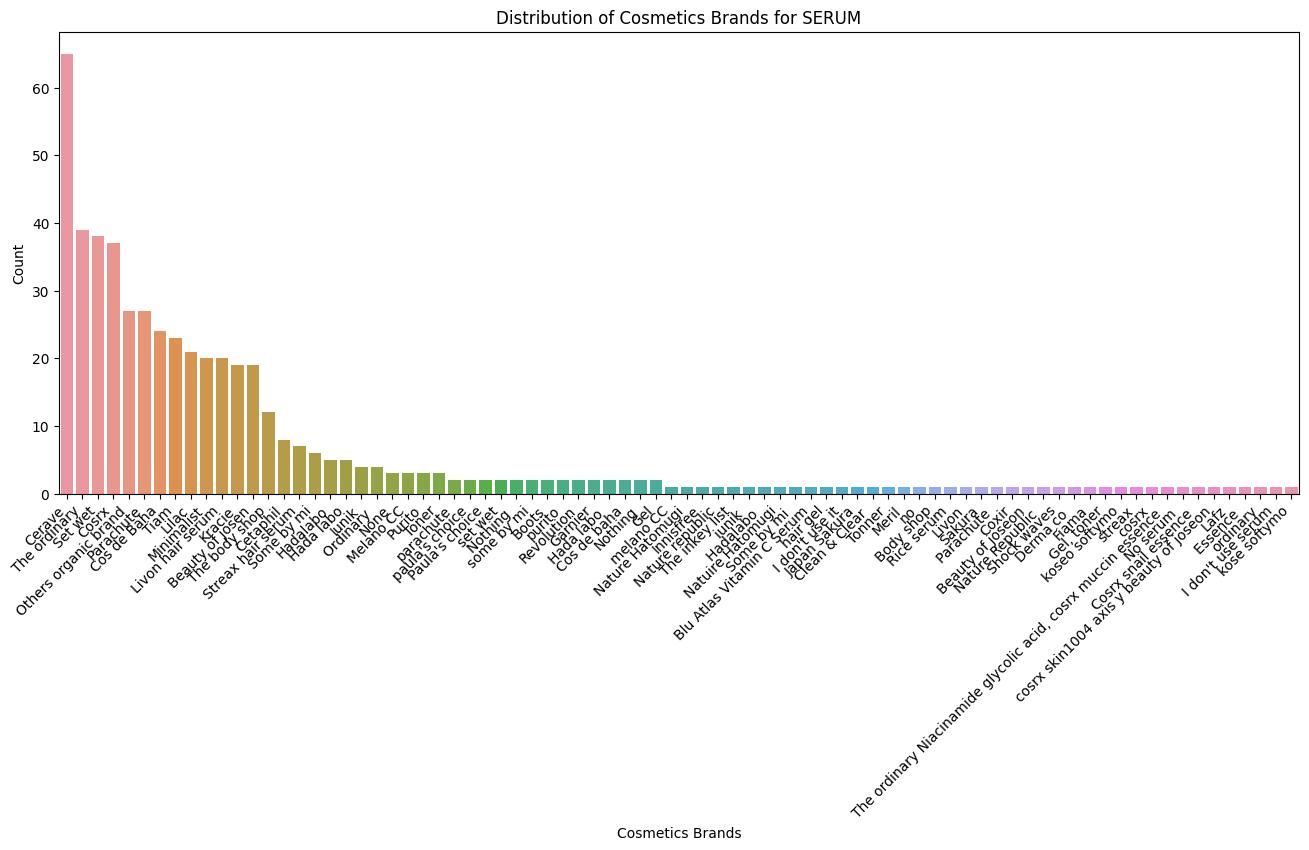

In [ ]:
# Print information about the attribute
attribute = 'What cosmetics brands do you currently use for serum (gel,essence,toner)?'
print("\nInformation about the attribute:", attribute)
print(df[attribute].describe())

# Visualize the distribution of serum  brands
plt.figure(figsize=(16, 6))
sns.countplot(x=attribute, data=df, order=df[attribute].value_counts().index)
plt.title('Distribution of Cosmetics Brands for SERUM')
plt.xlabel('Cosmetics Brands')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# Print each value along with its count in the  SERUM attribute
column = 'What cosmetics brands do you currently use for serum (gel,essence,toner)?'
print("\nInformation about the attribute:", column)
print(df[column].describe())
counts = df[column].value_counts()

print("\nCount of each value in the  Serum Brand attribute:")
for value, count in counts.items():
    print(f"{value}: {count}")


Information about the attribute: What cosmetics brands do you currently use for serum (gel,essence,toner)?
count        511
unique        80
top       Cerave
freq          65
Name: What cosmetics brands do you currently use for serum (gel,essence,toner)?, dtype: object

Count of each value in the  Serum Brand attribute:
Cerave: 65
The ordinary: 39
Set wet: 38
Cosrx: 37
Others organic brand: 27
Parachute: 27
Cos de Baha: 24
Tiam: 23
Lilac: 21
Minimalist: 20
Livon hair serum: 20
Kracie: 19
Beauty of josen: 19
The body shop: 12
Cetaphil: 8
Streax hair serum: 7
Some by mi: 6
Hadalabo: 5
Hada labo: 5
Iunik: 4
Ordinary : 4
None: 3
Melano CC: 3
Purito: 3
Toner: 3
parachute: 2
paula's choice: 2
Paula's choice: 2
set wet: 2
Nothing : 2
some by mi: 2
Boots: 2
purito: 2
Revolution: 2
Garnier: 2
Hada labo : 2
Cos de baha: 2
Nothing: 2
Gel: 2
melano CC: 1
Nature Hatomugi: 1
Innisfree: 1
Nature republic: 1
The inkey list: 1
iunik : 1
Hadalabo : 1
Natuire Hatomugi: 1
Some by mi : 1
Blu Atlas Vitamin

In [ ]:
# Calculate percentage distribution
percentage = df['What cosmetics brands do you currently use for serum (gel,essence,toner)?'].value_counts(normalize=True) * 100
print("\nPercentage Distribution of Each Serum brand:")
print(percentage)


Percentage Distribution of Each Serum brand:
Cerave                  12.720157
The ordinary             7.632094
Set wet                  7.436399
Cosrx                    7.240705
Others organic brand     5.283757
                          ...    
Lafz                     0.195695
Essence                  0.195695
ordinary                 0.195695
I don't use serum        0.195695
kose softymo             0.195695
Name: What cosmetics brands do you currently use for serum (gel,essence,toner)?, Length: 80, dtype: float64


# **Which country is this serum brand from?**


Information about the attribute: Which country is this serum brand from?
count         511
unique         15
top       5.Korea
freq          156
Name: Which country is this serum brand from?, dtype: object


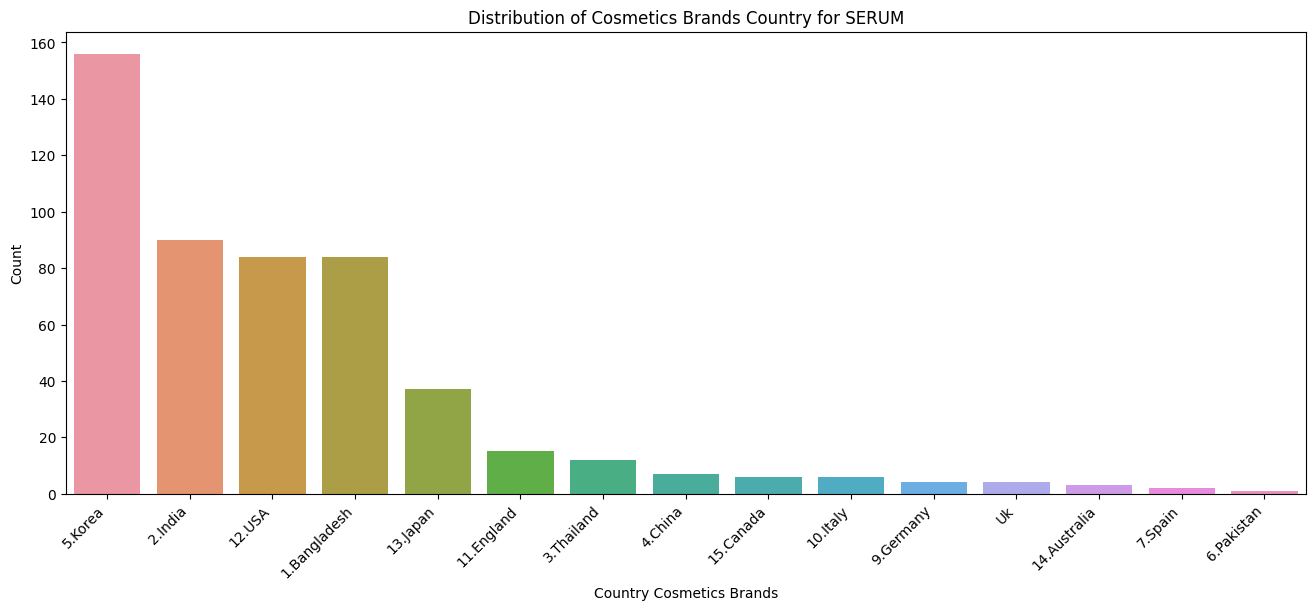

In [ ]:
# Print information about the attribute
attribute = 'Which country is this serum brand from?'
print("\nInformation about the attribute:", attribute)
print(df[attribute].describe())

# Visualize the distribution of serum brands
plt.figure(figsize=(16, 6))
sns.countplot(x=attribute, data=df, order=df[attribute].value_counts().index)
plt.title('Distribution of Cosmetics Brands Country for SERUM')
plt.xlabel('Country Cosmetics Brands')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# Print each value along with its count in the  SERUM country attribute
column = 'Which country is this serum brand from?'
print("\nInformation about the attribute:", column)
print(df[column].describe())
counts = df[column].value_counts()

print("\nCount of each value in the  Serum country attribute:")
for value, count in counts.items():
    print(f"{value}: {count}")


Information about the attribute: Which country is this serum brand from?
count         511
unique         15
top       5.Korea
freq          156
Name: Which country is this serum brand from?, dtype: object

Count of each value in the  Serum country attribute:
5.Korea: 156
2.India: 90
12.USA: 84
1.Bangladesh: 84
13.Japan: 37
11.England: 15
3.Thailand: 12
4.China: 7
15.Canada: 6
10.Italy: 6
9.Germany: 4
Uk: 4
14.Australia: 3
7.Spain: 2
6.Pakistan: 1


In [ ]:
# Calculate percentage distribution
percentage = df['Which country is this serum brand from?'].value_counts(normalize=True) * 100
print("\nPercentage Distribution of Each Serum brand country:")
print(percentage)


Percentage Distribution of Each Serum brand country:
5.Korea         30.528376
2.India         17.612524
12.USA          16.438356
1.Bangladesh    16.438356
13.Japan         7.240705
11.England       2.935421
3.Thailand       2.348337
4.China          1.369863
15.Canada        1.174168
10.Italy         1.174168
9.Germany        0.782779
Uk               0.782779
14.Australia     0.587084
7.Spain          0.391389
6.Pakistan       0.195695
Name: Which country is this serum brand from?, dtype: float64


# **What rating would you give this brand of serum?**

In [ ]:
# Information about the attribute: What rating would you give this brand of serum?
attribute = 'What rating would you give this brand of serum?'
print("\nInformation about the attribute:", attribute)
print(df[attribute].describe())

# Count occurrences of each value, including missing values
attribute_counts = df[attribute].value_counts().reset_index()
attribute_counts.columns = ['Value', 'Count']

# Print count of each unique value in the Serum attribute
print("\nCount of each unique value in the", attribute, "attribute:")
print(attribute_counts)


Information about the attribute: What rating would you give this brand of serum?
count      511
unique       4
top       Good
freq       328
Name: What rating would you give this brand of serum?, dtype: object

Count of each unique value in the What rating would you give this brand of serum? attribute:
       Value  Count
0       Good    328
1  Excellent    108
2    Average     69
3        Bad      6



Summary Statistics:
Most common value: Good
Value with the highest count: Good with count: 315


<Axes: xlabel='What rating would you give this brand of serum?', ylabel='Count'>

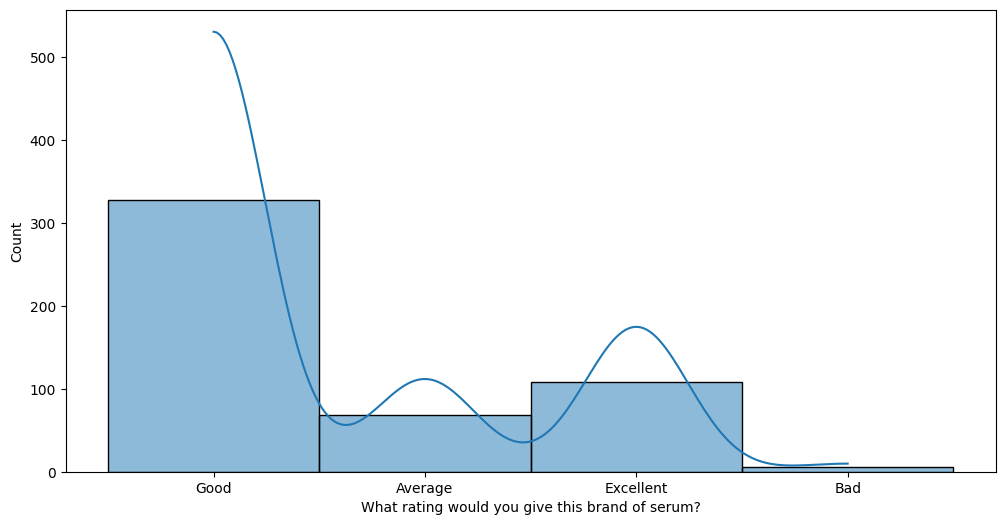

In [ ]:
# Summary Statistics
most_common_value = attribute_counts.iloc[0]['Value']
highest_count = attribute_counts.iloc[0]['Count']

print("\nSummary Statistics:")
print("Most common value:", most_common_value)
print("Value with the highest count:", most_common_value, "with count:", highest_count)
# Information about the attribute: What rating would you give this brand of serum?
rating_attribute = 'What rating would you give this brand of serum?'


# Visualize the distribution of serum?
plt.figure(figsize=(12, 6))
sns.histplot(df[rating_attribute].dropna(), bins=10, kde=True)


In [ ]:
# Calculate percentage distribution
percentage = df['What rating would you give this brand of serum?'].value_counts(normalize=True) * 100
print("\nPercentage Distribution of Serum Brand Rating:")
print(percentage)


Percentage Distribution of Serum Brand Rating:
Good         64.187867
Excellent    21.135029
Average      13.502935
Bad           1.174168
Name: What rating would you give this brand of serum?, dtype: float64


# **What cosmetics brands do you currently use for oils?(Hair oil,body oil,face oil)**


Information about the attribute: What cosmetics brands do you currently use for oils?(Hair oil,body oil,face oil)
count             511
unique             63
top       Organic oil
freq              131
Name: What cosmetics brands do you currently use for oils?(Hair oil,body oil,face oil), dtype: object


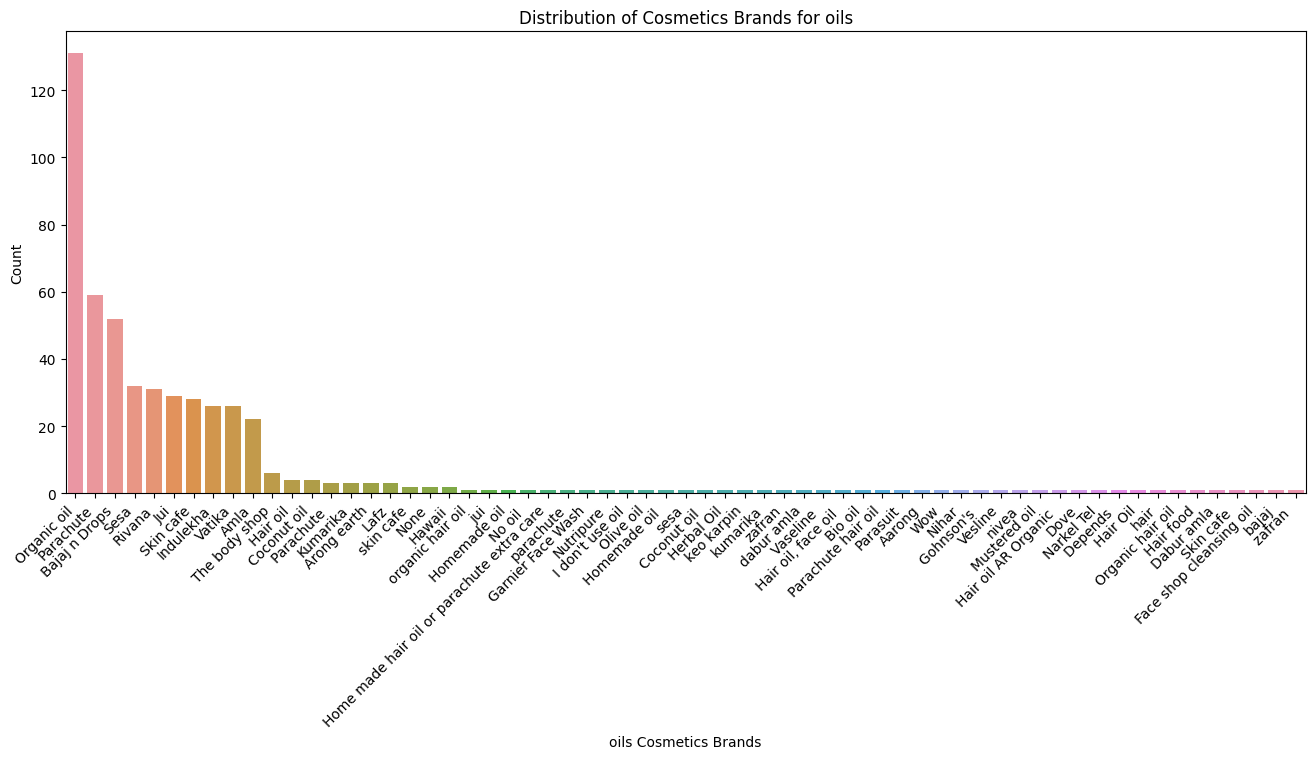

In [ ]:
# Print information about the attribute
attribute = 'What cosmetics brands do you currently use for oils?(Hair oil,body oil,face oil)'
print("\nInformation about the attribute:", attribute)
print(df[attribute].describe())

# Visualize the distribution of oils brands
plt.figure(figsize=(16, 6))
sns.countplot(x=attribute, data=df, order=df[attribute].value_counts().index)
plt.title('Distribution of Cosmetics Brands for oils')
plt.xlabel('oils Cosmetics Brands')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# Print each value along with its count in the  oils attribute
column = 'What cosmetics brands do you currently use for oils?(Hair oil,body oil,face oil)'
print("\nInformation about the attribute:", column)
print(df[column].describe())
counts = df[column].value_counts()

print("\nCount of each value in the  oils brand attribute:")
for value, count in counts.items():
    print(f"{value}: {count}")


Information about the attribute: What cosmetics brands do you currently use for oils?(Hair oil,body oil,face oil)
count             511
unique             63
top       Organic oil
freq              131
Name: What cosmetics brands do you currently use for oils?(Hair oil,body oil,face oil), dtype: object

Count of each value in the  oils brand attribute:
Organic oil: 131
Parachute: 59
Bajaj n Drops: 52
Sesa: 32
Rivana: 31
Jui: 29
Skin cafe: 28
Indulekha: 26
Vatika: 26
Amla: 22
The body shop: 6
Hair oil: 4
Coconut oil: 4
Parachute : 3
Kumarika: 3
Arong earth: 3
Lafz: 3
skin cafe: 2
None: 2
Hawaii: 2
organic hair oil: 1
jui: 1
Homemade oil: 1
No oil : 1
Home made hair oil or parachute extra care: 1
parachute: 1
Garnier Face Wash: 1
Nutripure: 1
I don't use oil: 1
Olive oil: 1
Homemade oil : 1
sesa: 1
Coconut oil : 1
Herbal Oil: 1
keo karpin: 1
kumarika: 1
zafran: 1
dabur amla: 1
Vaseline : 1
Hair oil, face oil : 1
Bio oil: 1
Parachute hair oil: 1
Parasuit: 1
Aarong: 1
Wow: 1
Nihar: 1
Gohn

In [ ]:
# Calculate percentage distribution
percentage = df['What cosmetics brands do you currently use for oils?(Hair oil,body oil,face oil)'].value_counts(normalize=True) * 100
print("\nPercentage Distribution of Each oil brand:")
print(percentage)


Percentage Distribution of Each oil brand:
Organic oil                25.636008
Parachute                  11.545988
Bajaj n Drops              10.176125
Sesa                        6.262231
Rivana                      6.066536
                             ...    
Dabur amla                  0.195695
Skin cafe                   0.195695
Face shop cleansing oil     0.195695
bajaj                       0.195695
zafran                      0.195695
Name: What cosmetics brands do you currently use for oils?(Hair oil,body oil,face oil), Length: 63, dtype: float64


# **Which country is this oil brand from?**


Information about the attribute: Which country is this oil brand from?
count              511
unique              15
top       1.Bangladesh
freq               293
Name: Which country is this oil brand from?, dtype: object


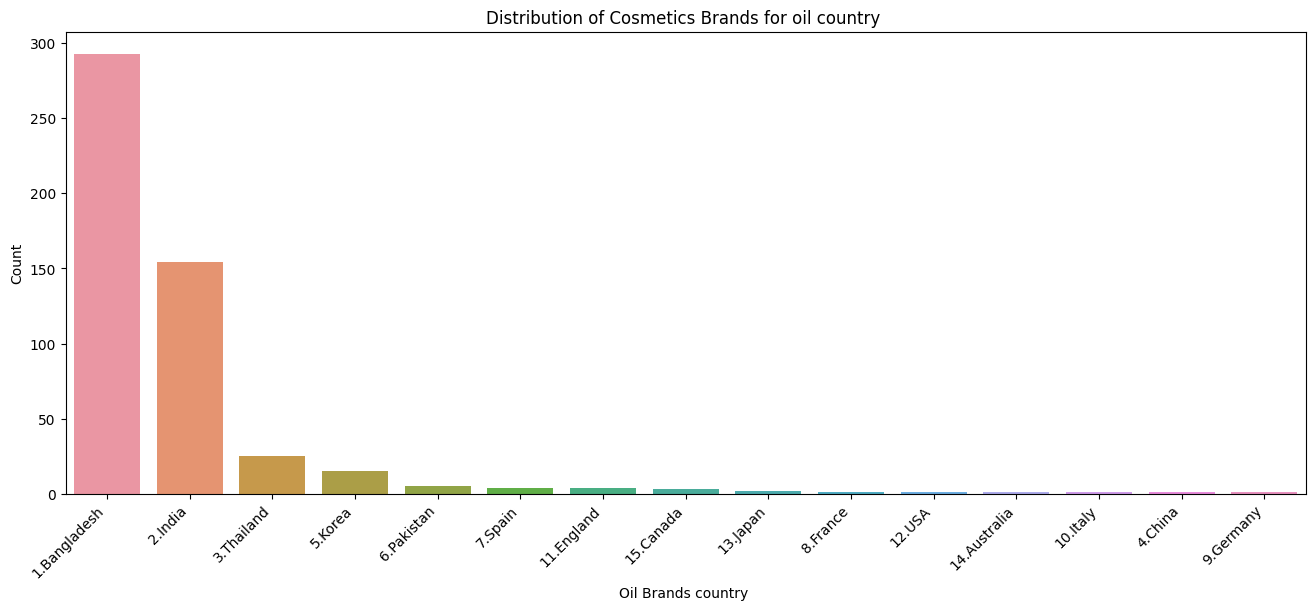

In [ ]:
# Print information about the attribute
attribute = 'Which country is this oil brand from?'
print("\nInformation about the attribute:", attribute)
print(df[attribute].describe())

# Visualize the distribution of oil brands
plt.figure(figsize=(16, 6))
sns.countplot(x=attribute, data=df, order=df[attribute].value_counts().index)
plt.title('Distribution of Cosmetics Brands for oil country ')
plt.xlabel('Oil Brands country ')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# Print each value along with its count in the oil attribute
column = 'Which country is this oil brand from?'
print("\nInformation about the attribute:", column)
print(df[column].describe())
counts = df[column].value_counts()

print("\nCount of each value in the country of oil attribute:")
for value, count in counts.items():
    print(f"{value}: {count}")


Information about the attribute: Which country is this oil brand from?
count              511
unique              15
top       1.Bangladesh
freq               293
Name: Which country is this oil brand from?, dtype: object

Count of each value in the country of oil attribute:
1.Bangladesh: 293
2.India: 154
3.Thailand: 25
5.Korea: 15
6.Pakistan: 5
7.Spain: 4
11.England: 4
15.Canada: 3
13.Japan: 2
8.France: 1
12.USA: 1
14.Australia: 1
10.Italy: 1
4.China: 1
9.Germany: 1


In [ ]:
# Calculate percentage distribution
percentage = df['Which country is this oil brand from?'].value_counts(normalize=True) * 100
print("\nPercentage Distribution of Each oil Brands by countrys:")
print(percentage)


Percentage Distribution of Each oil Brands by countrys:
1.Bangladesh    57.338552
2.India         30.136986
3.Thailand       4.892368
5.Korea          2.935421
6.Pakistan       0.978474
7.Spain          0.782779
11.England       0.782779
15.Canada        0.587084
13.Japan         0.391389
8.France         0.195695
12.USA           0.195695
14.Australia     0.195695
10.Italy         0.195695
4.China          0.195695
9.Germany        0.195695
Name: Which country is this oil brand from?, dtype: float64


# **What rating would you give this brand of oil ?**

In [ ]:
# Information about the attribute: What rating would you give this brand of oil ?
attribute = 'What rating would you give this brand of oil ?'
print("\nInformation about the attribute:", attribute)
print(df[attribute].describe())

# Count occurrences of each value, including missing values
attribute_counts = df[attribute].value_counts().reset_index()
attribute_counts.columns = ['Value', 'Count']

# Print count of each unique value in the Rating of oil attribute
print("\nCount of each unique value in the", attribute, "attribute:")
print(attribute_counts)


Information about the attribute: What rating would you give this brand of oil ?
count      511
unique       4
top       Good
freq       315
Name: What rating would you give this brand of oil ?, dtype: object

Count of each unique value in the What rating would you give this brand of oil ? attribute:
       Value  Count
0       Good    315
1    Average    108
2  Excellent     84
3        Bad      4



Summary Statistics:
Most common value: Good
Value with the highest count: Good with count: 315


<Axes: xlabel='What rating would you give this brand of oil ?', ylabel='Count'>

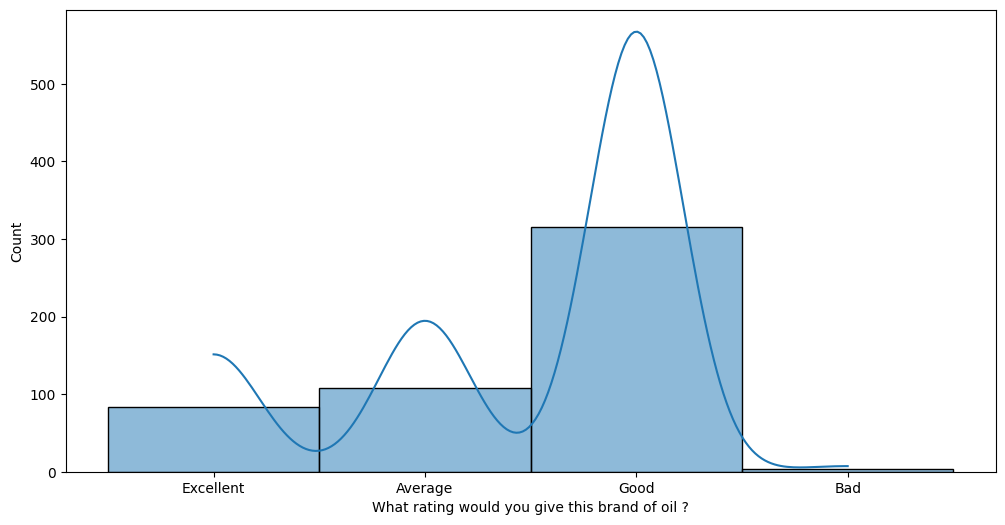

In [ ]:
# Summary Statistics
most_common_value = attribute_counts.iloc[0]['Value']
highest_count = attribute_counts.iloc[0]['Count']

print("\nSummary Statistics:")
print("Most common value:", most_common_value)
print("Value with the highest count:", most_common_value, "with count:", highest_count)
# Information about the attribute: What rating would you give this brand of oil ?
rating_attribute = 'What rating would you give this brand of oil ?'


# Visualize the distribution of Oil brand Rating?
plt.figure(figsize=(12, 6))
sns.histplot(df[rating_attribute].dropna(), bins=10, kde=True)


In [ ]:
# Calculate percentage oil Rating distribution
percentage = df['What rating would you give this brand of oil ?'].value_counts(normalize=True) * 100
print("\nPercentage Distribution of Each oil brand:")
print(percentage)


Percentage Distribution of Each oil brand:
Good         61.643836
Average      21.135029
Excellent    16.438356
Bad           0.782779
Name: What rating would you give this brand of oil ?, dtype: float64
